# Transform Data - 2013 Presidential, Parliamentary and Local Elections
**DATE: August 20th, 2018**

-----
## ZEC 2013 Elections Report Data Cheks and Validation Data
-----

These are trhe best validation data points I could find, i.e. all the tables in this report:http://www.veritaszim.net/sites/veritas_d/files/ZEC%202013%20Harmonised%20Elections%20Report.pdf
    

### Import libraries and load the checks data 

In [2026]:
### Import libraries
import warnings; warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
import h5py
import matplotlib.pyplot as plt
import os
import pivottablejs as pvt
from tabula import read_pdf
%matplotlib inline
import itertools
import matplotlib.ticker as tic

# set the right foldername
DATA = './data_source/2013 results/'
MAIN = './'
TARGET = './data_final/'

# check to see files
os.listdir(DATA);

In [2027]:
def getNumCols(df):
    df = df._get_numeric_data()
    df_cols = [c for c in df.columns if ('pct' not in c and 'check_sum' not in c)]
    #print(df.columns, df_cols)
    return df_cols

def sep1000Formatter(n):
    return "{:,}".format(int(n))

# Cool way to dynamically change font size based on number of bars on bar chart
def scaleFont(bnew, bbase, fbase):
    """ takes number of bars, the baseline bars and corresponding baseline font and returns recommended fontsize"""
    # 8 bars get fontsize 12?
    return 16 if bnew==1 else int(np.log(bbase)/np.log(bnew)) + fbase +1

In [2028]:
# import the check files into chk
raw_chk = pd.ExcelFile(DATA+'tabula-zec-2013-report_check_sep.xlsx')
chk_names = raw_chk.sheet_names;
chk = {name:raw_chk.parse(name) for name in chk_names}
print(chk_names)

['count_candidate', 'count_polling_station', 'count_regvoters', 'results_locauthority', 'results_natassembly', 'results_natassembly_women', 'results_presidential']


In [2029]:
# add the local authority ward list
wardlist = pd.read_csv(DATA+'tabula-2013-Local-Authorities-Results_Ward_Map.csv')
chk_names.append("wardlist"); chk["wardlist"]= wardlist

### Pre-process all of the checks tables 
Store them in a dictionary of dataframes for easy access with a list of tabnames as keys

In [2030]:
# Processing \, deal with nulls, columns names and text cleaning
for nm in chk_names:
    print("\n------\nprocessing... ", nm)
    df = chk[nm]
    df.fillna(value=0, inplace=True)
    df.columns = [str(x).strip().lower() for x in df.columns]
    # Clean up the text columns first
    for c in df.columns[df.dtypes == 'object']:
        print("\t*column...",c)
        df.loc[:,c] = df[c].apply(lambda x: str(x).strip().lower())
        print("\tsneak-peak",[x for x in df.iloc[1,:]])
print("DONE.")


------
processing...  count_candidate
	*column... election_lvl
	sneak-peak ['national assembly', 842]

------
processing...  count_polling_station
	*column... province
	sneak-peak ['harare', 875]

------
processing...  count_regvoters
	*column... province
	sneak-peak ['harare', 826274, 1119400]

------
processing...  results_locauthority
	*column... province
	sneak-peak ['harare', 0.0, 0.0, 0.0, 0.0, 54, 24.0, 0.0]

------
processing...  results_natassembly
	*column... province
	sneak-peak ['harare', 6, 23, 0.0]

------
processing...  results_natassembly_women
	*column... province
	sneak-peak ['harare', 0.0, 3, 3]

------
processing...  results_presidential
	*column... province
	sneak-peak ['harare', 843, 172163, 361, 7846, 261925, 6167, 449305]

------
processing...  wardlist
	*column... local_authority
	sneak-peak ['bulawayo municipality', 1, 2]
DONE.


In [2031]:
# See the content of check tables
for nm in chk_names:
    df = chk[nm]; print("\n","=="*50, "\n",df.head())


         election_lvl  no_candidates
0       presidential              5
1  national assembly            842
2  local authorities           4827

        province  no_pol_station
0      bulawayo             392
1        harare             875
2    manicaland            1303
3  mash central             822
4     mash east            1047

        province  voter_pop  ballots_printed
0      bulawayo     320598           434200
1        harare     826274          1119400
2    manicaland     849499          1160200
3  mash central     603639           827000
4     mash east     724402           989300

        province  other  equality_of_votes  independent  mdc  mdc_t  zanu_pf  \
0      bulawayo    0.0                0.0          0.0  0.0     29      0.0   
1        harare    0.0                0.0          0.0  0.0     54     24.0   
2    manicaland    0.0                1.0          0.0  0.0     62    197.0   
3  mash central    1.0                0.0          0.0  0.0      5    226.0 

### Plotting the check tables

In [2032]:
def sortCheckDF(df):
    """ Takes df returns choice column to sort on"""
    sc = 'no_candidates', 'zanu_pf', 'no_pol_station', 'voter_pop'
    c = [c for c in sc if c in df.columns]
    return df.sort_values(by=c, ascending=False)

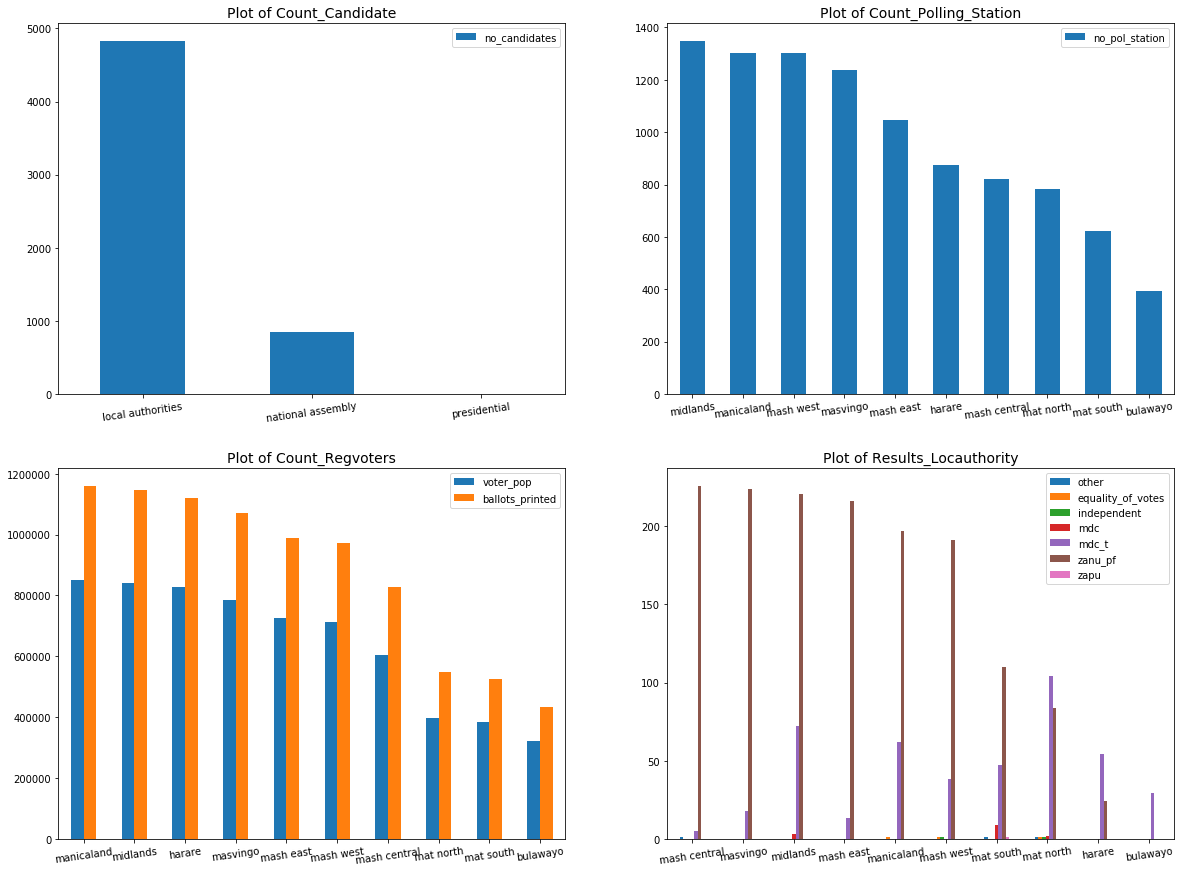

In [2033]:
# plot them all at once?
f, axes = plt.subplots(2, 2, figsize=(20,15))
X= list(itertools.chain(*axes))

for i in range(4):
    d = sortCheckDF(chk[chk_names[i]])
    d.plot(kind="bar", ax=X[i], title= "Plot of "+ chk_names[i].title())
    X[i].set_xticklabels(d.iloc[:,0], rotation=8)
    X[i].title.set_size(14)
    #for j in [0,1]:
    #    xl[i].text(j-0.2, d.iloc[j,0]/2,  d.iloc[j,0], fontsize=16)
    #    xl[i].text(j+0.1,d.iloc[j,1]/2,  d.iloc[j,1], fontsize=16)

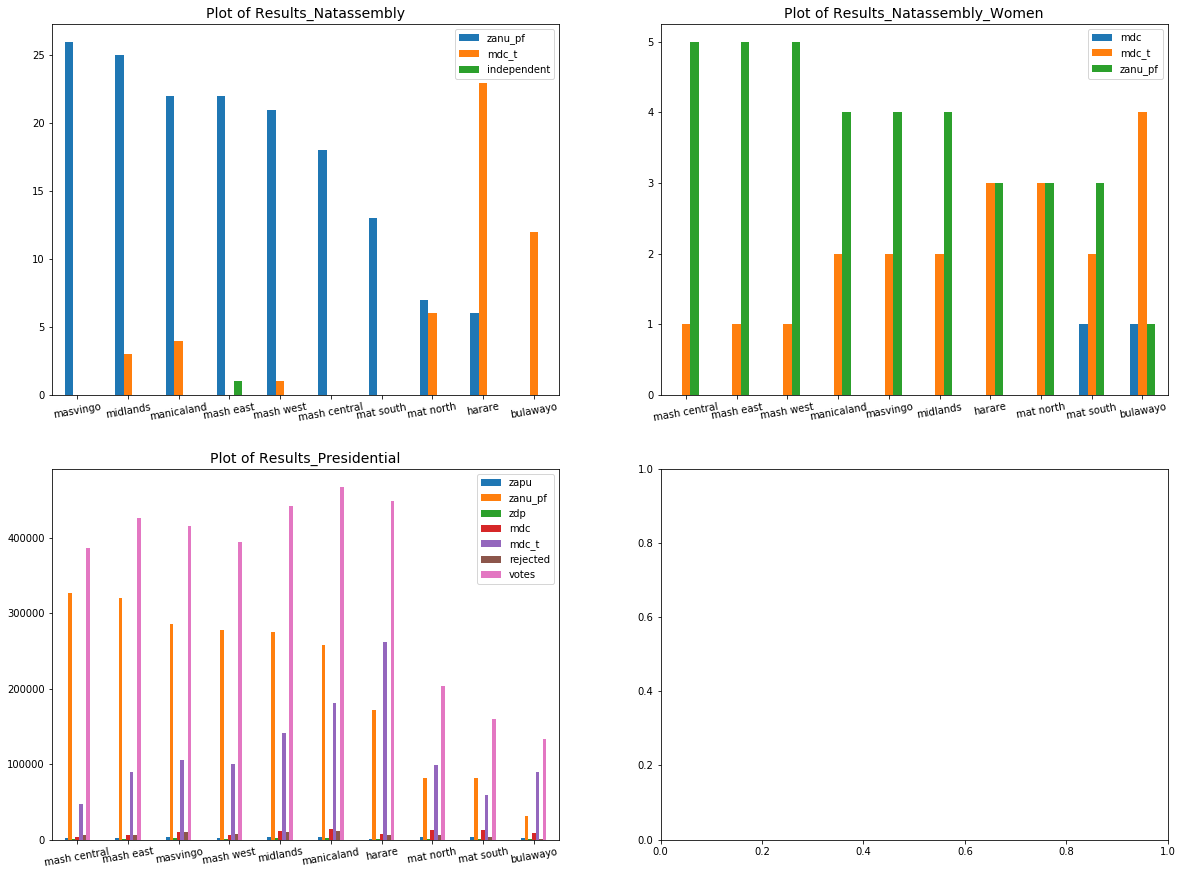

In [2034]:
# plot them all at once?
f, axes = plt.subplots(2, 2, figsize=(20,15))
X= list(itertools.chain(*axes))

for i in range(4,7):
    d = sortCheckDF(chk[chk_names[i]])
    d.plot(kind="bar", ax=X[i-4], title= "Plot of "+ chk_names[i].title())
    X[i-4].set_xticklabels(d.iloc[:,0], rotation=10)
    X[i-4].title.set_size(14)
    #for j in [0,1]:
    #    xl[i].text(j-0.2, d.iloc[j,0]/2,  d.iloc[j,0], fontsize=16)
    #    xl[i].text(j+0.1,d.iloc[j,1]/2,  d.iloc[j,1], fontsize=16)

-----
## 1. Presidential data (2013)
---------

Data sources: mixed - Kubatana.org http://archive.kubatana.net/html/archive/elec/130801kubres.asp and Election Resources Council https://erczim.org/2015/08/26/2013-presidential-results/

In [2035]:
# make sure the folder only contains the excel files of interest
# make a list of the filename to loop through later
# grab only the excel files
provincial_filenames = [DATA+f for f in os.listdir(DATA) if 'Presidential_Results_Formatted_13-08-2013.csv' in f]

provincial_filenames

['./data_source/2013 results/tabula-2013Bulawayo_Presidential_Results_Formatted_13-08-2013.csv',
 './data_source/2013 results/tabula-2013Harare_Presidential_Results_Formatted_13-08-2013.csv',
 './data_source/2013 results/tabula-2013Manicaland_Presidential_Results_Formatted_13-08-2013.csv',
 './data_source/2013 results/tabula-2013Mash_Central_Presidential_Results_Formatted_13-08-2013.csv',
 './data_source/2013 results/tabula-2013Mash_East_Presidential_Results_Formatted_13-08-2013.csv',
 './data_source/2013 results/tabula-2013Mash_West_Presidential_Results_Formatted_13-08-2013.csv',
 './data_source/2013 results/tabula-2013Masvingo_Presidential_Results_Formatted_13-08-2013.csv',
 './data_source/2013 results/tabula-2013MatNorth_Presidential_Results_Formatted_13-08-2013.csv',
 './data_source/2013 results/tabula-2013MatSouth_Presidential_Results_Formatted_13-08-2013.csv',
 './data_source/2013 results/tabula-2013Midlands_Presidential_Results_Formatted_13-08-2013.csv']

### Function to Convert CSV to Dataframes

In [2036]:
def loadCsvData(file):
    """
    Takes filename for csv, loads and processes to return clean dataframe
    """
    #print("\n-----------\nloading... "+ file + "\n")
    # import the provincial results file
    df = pd.read_csv(file)
    
    #print("processing columns... "+file+" ...\n")
    cols = ['province', 'local_authority', 'district', 'constituency', 'ward_no',
           'polling_station', 'facility', 'zapu',
           'zanu_pf', 'zdp', 'mdc',  'mdc_t', 'rejected',
           'unaccounted_for', 'votes_cast',   'votes_valid']
    df = df.iloc[:, :16].copy()
    df.columns=cols 
    #print("removing null rows, start-shape... "+str(df.shape)+ "...\n")
    df = df[df.province.notnull() & df.district.notnull()  & df.constituency.notnull() & df.polling_station.notnull()]
    #print("Done. end-shape... "+str(df.shape)+ "...\n")
    return df

### Convert all Excel Files to DataFrames

In [2037]:
# get lists of dfs, each containing an aggregated and disaggregated dataframe
# each list entry represents a province
raw_dfs = [loadCsvData(fn) for fn in provincial_filenames]


### Concatenate DataFrames

In [2038]:
# Concatenate
rconcat = pd.concat(raw_dfs)
rconcat = rconcat.reset_index().drop(['index'], axis=1)

# Convert and save to Excel in the main folder
#rconcat.to_excel(MAIN+"2013presidential_results_bypollingstation.xlsx")

In [2039]:
rconcat.shape

(9728, 16)

In [2040]:
rconcat.dtypes

province            object
local_authority     object
district            object
constituency        object
ward_no            float64
polling_station     object
facility            object
zapu               float64
zanu_pf            float64
zdp                float64
mdc                float64
mdc_t              float64
rejected           float64
unaccounted_for    float64
votes_cast         float64
votes_valid        float64
dtype: object

### Deal with null values

In [2041]:
# Clean up the text columns first
for c in rconcat.columns[rconcat.dtypes == 'object']:
    print(c)
    rconcat.loc[:,c] = rconcat[c].apply(lambda x: str(x).strip().lower()) 

facilities = set(rconcat.facility)
facilities;

province
local_authority
district
constituency
polling_station
facility


In [2042]:
# function to see if string contains facilityname
def containsFacName(str1, faclist):
    """ takes in string and set of facilities"""
    s= str1.split()
    l1 = s[-2:]
    l2 = [faclist.issuperset({x}) for x in l1]

    if l2[0] and l2[1]:
        r = " ".join(l1)
    elif l2[0]:
        r = l1[0]
    elif l2[1]:
        r = l1[1]
    else:
        if len(s) >= 3 and faclist.issuperset({s[-3]}):
            r = s[-3]
        else:
            r = "Unknown"
    return r       

In [2043]:
# facility nulls
facnull_idx = rconcat[rconcat.facility=='nan'].index
facnull_idx

Int64Index([1126, 1127, 2072, 2569, 2570, 2571, 2572, 2573, 2574, 2575,
            ...
            3382, 3383, 3384, 3385, 3386, 3387, 3388, 3389, 3390, 8212],
           dtype='int64', length=795)

In [2044]:
new_facnames = rconcat.loc[facnull_idx, "polling_station"].apply(lambda x: containsFacName(x, facilities))
new_facnames;
rconcat.loc[facnull_idx, "facility"] = new_facnames

In [2045]:
# See the reminaining nulls. Safe to conclude they are all zero entries
#rconcat[rconcat.zapu.isnull() | rconcat['zanu_pf'].isnull() | rconcat.zdp.isnull() 
#| rconcat.mdc.isnull()  | rconcat.rejected.isnull() | rconcat.unaccounted_for.isnull()]

In [2046]:
# replace nulls with zero
rconcat.fillna(value=0, inplace = True)

In [2047]:
rconcat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9728 entries, 0 to 9727
Data columns (total 16 columns):
province           9728 non-null object
local_authority    9728 non-null object
district           9728 non-null object
constituency       9728 non-null object
ward_no            9728 non-null float64
polling_station    9728 non-null object
facility           9728 non-null object
zapu               9728 non-null float64
zanu_pf            9728 non-null float64
zdp                9728 non-null float64
mdc                9728 non-null float64
mdc_t              9728 non-null float64
rejected           9728 non-null float64
unaccounted_for    9728 non-null float64
votes_cast         9728 non-null float64
votes_valid        9728 non-null float64
dtypes: float64(10), object(6)
memory usage: 1.2+ MB


### Check duplicates

In [2048]:
# polling stations duplicated
presunq_cols =['province', 'local_authority', 'district', 'constituency',
                 'ward_no','polling_station', 'facility']
unq = rconcat.groupby(presunq_cols).count().reset_index()[presunq_cols]
unq[unq.duplicated(keep=False)]

,province,local_authority,district,constituency,ward_no,polling_station,facility


### Check Valid Votes

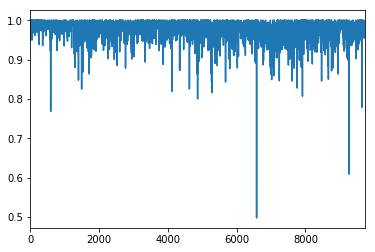

In [2049]:
a=rconcat.votes_valid/rconcat.votes_cast; a.plot()

In [2050]:
rconcat[rconcat.votes_valid/rconcat.votes_cast <0.4]['province'].unique()

array([], dtype=object)

In [2051]:
rconcat[rconcat.votes_valid>rconcat.votes_cast]

,province,local_authority,district,constituency,ward_no,polling_station,facility,zapu,zanu_pf,zdp,mdc,mdc_t,rejected,unaccounted_for,votes_cast,votes_valid


## Save the final final presidential votes 2013

In [2052]:
rconcat.to_excel(TARGET+"2013presidential_results_bypollingstation.xlsx")

-------
# 2 - Parliamentary data (2013)
------


Data sources: mixed - Kubatana.org http://archive.kubatana.net/html/archive/elec/130801kubres.asp and Election Resources Council https://erczim.org/2015/08/26/2013-presidential-results/

### Read in Parliamentary Elections file

In [2053]:
dpa = pd.ExcelFile(DATA+"harmonised_election_assembly_results_130806_cleaned.xls")

In [2054]:
dpa.sheet_names

['Election results', 'Winning Candidates', 'Sheet2', 'Sheet3']

In [2055]:
dpa, dwin = dpa.parse(sheetname="Election results").copy(), dpa.parse(sheetname="Winning Candidates").copy()

In [2056]:
dpa.shape

(232, 24)

In [2057]:
pcols = ['constituency', 'won_pct', 'turnout', 'votes', 'mdc_t', 'zanu_pf', 'mdc', 'zapu', 'mkd', 
 'independent', 'umd', 'ake', 'zpm', 'zanu_ndonga', 'fcz', 'pud', 'pimz', 'zdp', 'freedom_front', 
'vp', 'freezim_congress', 'mcd', 'ctd', 'unknown_balance']

In [2058]:
len(pcols)

24

In [2059]:
dpa.columns = pcols

In [2060]:
dpa = dpa.loc[3:,:].copy()

### Extract province name

In [2061]:
fillprov_idx = dpa[dpa['constituency'].notnull() & (dpa['constituency']!= 'Chirumhanzu') & dpa['won_pct'].isnull()].index
fillprov_idx

Int64Index([3, 17, 48, 76, 96, 121, 145, 173, 203, 218], dtype='int64')

In [2062]:
# make province column, with nulls
dpa['province'] = np.nan

In [2063]:
dpa.province.isnull().sum()

229

In [2064]:
# null fill with province strategically fill down the nulls
dpa.loc[fillprov_idx, 'province'] = dpa.loc[fillprov_idx, 'constituency'] 

In [2065]:
dpa['province'].fillna(method='ffill', inplace=True)

In [2066]:
dpa.head()

,constituency,won_pct,turnout,votes,mdc_t,zanu_pf,mdc,zapu,mkd,independent,...,pud,pimz,zdp,freedom_front,vp,freezim_congress,mcd,ctd,unknown_balance,province
3,BULAWAYO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BULAWAYO
4,Bulawayo Central,0.568,0.41,11206,6365,2827,1572,259,126,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BULAWAYO
5,Bulawayo East,0.373,0.51,12172,4560,2842,4540,NaN,35,12533,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BULAWAYO
6,Bulawayo South,0.664,0.45,9584,6364,1787,1078,105,46,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,158,BULAWAYO
7,Emakhandeni -Entubane,0.5787,0.37,9203,5326,1974,1104,185,NaN,554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BULAWAYO


In [2067]:
set(dpa.constituency)

{'BULAWAYO',
 'Beitbridge East',
 'Beitbridge West',
 'Bikita East',
 'Bikita South',
 'Bikita West',
 'Bindura North',
 'Bindura South',
 'Binga North',
 'Binga South',
 'Bubi',
 'Budiriro',
 'Buhera Central',
 'Buhera North',
 'Buhera South',
 'Buhera West',
 'Bulawayo Central',
 'Bulawayo East',
 'Bulawayo South',
 'Bulilima East',
 'Bulilima West',
 'Chakari',
 'Chegutu East',
 'Chegutu West',
 'Chikomba Central',
 'Chikomba East',
 'Chikomba West',
 'Chimanimani East',
 'Chimanimani West',
 'Chinhoyi',
 'Chipinge Central',
 'Chipinge East',
 'Chipinge South',
 'Chipinge West',
 'Chiredzi East',
 'Chiredzi North',
 'Chiredzi South',
 'Chiredzi West',
 'Chirumhanzu',
 'Chirumhanzu-Zibagwe',
 'Chitungwiza North',
 'Chitungwiza South',
 'Chivi Central',
 'Chivi North',
 'Chivi South',
 'Chiwundura',
 'Dangamvura-Chikanga',
 'Dzivaresekwa',
 'Emakhandeni -Entubane',
 'Epworth',
 'Glen Norah',
 'Glen View South',
 'Glenview North',
 'Gokwe',
 'Gokwe Kana',
 'Gokwe Mapfungautsi',
 'Gokwe

### Deal with Nulls for 2013 parly data

In [2068]:
# reduce the obvious null rows
dpa = dpa[ dpa['constituency'].notnull() & (dpa['constituency']!='nan' ) & dpa['won_pct'].notnull()].copy()

#### data types

In [2069]:
dpa.dtypes

constituency        object
won_pct             object
turnout             object
votes               object
mdc_t               object
zanu_pf             object
mdc                 object
zapu                object
mkd                 object
independent         object
umd                 object
ake                 object
zpm                 object
zanu_ndonga         object
fcz                 object
pud                 object
pimz                object
zdp                 object
freedom_front       object
vp                  object
freezim_congress    object
mcd                 object
ctd                 object
unknown_balance     object
province            object
dtype: object

In [2070]:
# change to numerical types
ncols =  ['won_pct', 'turnout', 'votes', 'mdc_t', 'zanu_pf', 'mdc', 'zapu', 'mkd', 
 'independent', 'umd', 'ake', 'zpm', 'zanu_ndonga', 'fcz', 'pud', 'pimz', 'zdp', 'freedom_front', 
'vp', 'freezim_congress', 'mcd', 'ctd', 'unknown_balance']
for c in ncols:
    dpa.loc[:, c] = dpa[c].apply(lambda x: pd.to_numeric(x)) 

In [2071]:
# Clean up the text columns first
for c in dpa.columns[dpa.dtypes == 'object']:
    print(c)
    dpa.loc[:,c] = dpa[c].apply(lambda x: str(x).strip().lower()) 

constituency
province


In [2072]:
dpa.isnull().sum()

constituency          0
won_pct               0
turnout               0
votes                 0
mdc_t                 1
zanu_pf               0
mdc                  11
zapu                161
mkd                 178
independent         149
umd                 190
ake                 201
zpm                 207
zanu_ndonga         199
fcz                 202
pud                 207
pimz                206
zdp                 207
freedom_front       207
vp                  208
freezim_congress    207
mcd                 208
ctd                 208
unknown_balance     192
province              0
dtype: int64

In [2073]:
dpa.shape

(209, 25)

In [2074]:
# Assuming reminiang nulls are zeros
dpa.fillna(value=0, inplace=True)

In [2075]:
dpa.isnull().sum().sum()

0

In [2076]:
# map the provinces
parmap= {'bulawayo':'bulawayo', 'harare':'harare', 'manicaland':'manicaland', 'mashonaland central':'mash central',
       'mashonaland east':'mash east', 'mashonaland west':'mash west', 'masvingo':'masvingo', 'midlands':'midlands',
       'matabeleland north':'mat north', 'matabeleland south':'mat south'}
dpa.loc[:, 'province'] = dpa['province'].replace(parmap)

In [2077]:
dpa = dpa[['province', 'constituency', 'won_pct', 'turnout', 'votes', 'mdc_t', 'zanu_pf', 'mdc', 'zapu', 'mkd', 
 'independent', 'umd', 'ake', 'zpm', 'zanu_ndonga', 'fcz', 'pud', 'pimz', 'zdp', 'freedom_front', 
'vp', 'freezim_congress', 'mcd', 'ctd', 'unknown_balance']].copy()

In [2078]:
dpa.dtypes

province             object
constituency         object
won_pct             float64
turnout             float64
votes                 int64
mdc_t               float64
zanu_pf               int64
mdc                 float64
zapu                float64
mkd                 float64
independent         float64
umd                 float64
ake                 float64
zpm                 float64
zanu_ndonga         float64
fcz                 float64
pud                 float64
pimz                float64
zdp                 float64
freedom_front       float64
vp                  float64
freezim_congress    float64
mcd                 float64
ctd                 float64
unknown_balance     float64
dtype: object

### Now save the parliamentary 2013 votes data by constituency

In [2079]:
dpa.to_excel(TARGET+"2013parliamentary_results_byconstituency.xlsx")

------
## Local Authority Results
------

Data sources: mixed - Kubatana.org http://archive.kubatana.net/html/archive/elec/130801kubres.asp and Election Resources Council https://erczim.org/2015/08/26/2013-presidential-results/

### Load the local authority data

In [2080]:
os.listdir(DATA);

In [2081]:
dla = pd.read_csv(DATA+'tabula-2013-Local-Authorities-Results.csv'); dla.shape

(4802, 8)

In [2082]:
dla.head()

,province,local_authority,ward_no,candidate,sex,party,contested,votes
0,bulawayo,bulawayo municipality,1,ncube mlandu,m,mdc-t,1,1165
1,bulawayo,bulawayo municipality,1,moyo bertha,f,zanu pf,1,731
2,bulawayo,bulawayo municipality,1,siso mbuso,m,mdc,1,353
3,bulawayo,bulawayo municipality,1,mpofu canaan,m,zapu,1,62
4,bulawayo,bulawayo municipality,2,mataka sithabile,f,mdc-t,1,2609


In [2083]:
#standardize province names
set(dla.province);
la_pmap = {'bulawayo metropolitan ':'bulawayo',
 'harare metropolitan ': 'harare',
 'manicaland ': 'manicaland',
 'mashonaland central ': 'mash central',
 'mashonaland east ': 'mash east',
 'mashonaland west ': 'mash west',
 'masvingo ': 'masvingo',
 'matebeleland north ': 'mat north',
 'matebeleland south ': 'mat south',
    'midlands': 'midlands'      ,
           
 'midlands': 'midlands',
 'manicaland': 'manicaland',
 'mashonaland central': 'mash central',
 'mashonaland east': 'mash east',
 'mashonaland west': 'mash west',
 'masvingo': 'masvingo',
 'matebeleland north': 'mat north',
 'matebeleland south': 'mat south',
 'midlands': 'midlands'          
          }
dla.loc[:,'province'] = dla['province'].replace(la_pmap);

In [2084]:
dla.province.unique()

array(['bulawayo', 'harare', 'manicaland', 'mash central', 'mash east',
       'mash west', 'masvingo', 'mat north', 'mat south', 'midlands'], dtype=object)

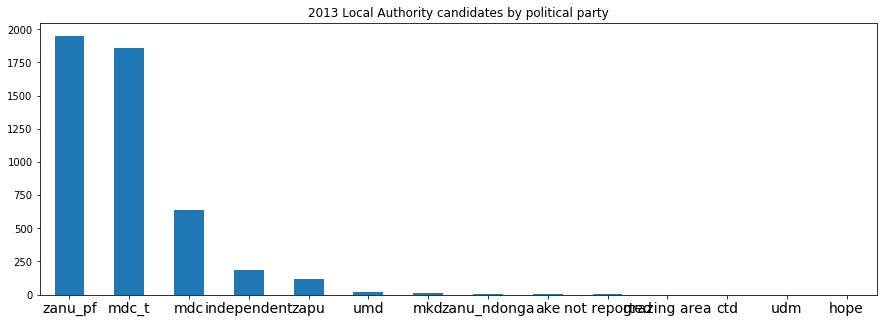

In [2085]:
# Standardize the party names
set(dla.party.unique());
la_map = {'a.k.e':'ake', 'ake':'ake', 'ctd':'ctd', 'hope':'hope', 'idependent':'independent',
 'inde':'independent', 'independant':'independent', 'independent':'independent',
 'indepenent':'independent', 'inependent':'independent',
 'm.d.c':'mdc', 'm.d.c-t':'mdc_t', 'm.d.c.':'mdc', 'm.d.c.t':'mdc_t', 'm.d.ct':'mdc_t', 'mcd':'mdc', 'mdc':'mdc',
 'mdc - t':'mdc_t', 'mdc -t':'mdc_t', 'mdc n':'mdc', 'mdc t':'mdc_t', 'mdc-n':'mdc', 'mdc-t':'mdc_t', 'mdct':'mdc_t',
 'mkd':'mkd', 'mtc t':'mdc_t', 'tmdc t':'mdc_t', 'udm':'udm', 'umd':'umd', 'wzaanu pf':'zanu_pf',
 'zanu (pf)':'zanu_pf', 'zanu ndonga':'zanu_ndonga', 'zanu pf':'zanu_pf', 'zanu pfu':'zanu_pf', 'zanu(pf)':'zanu_pf',
 'zanu-pf':'zanu_pf', 'zanu_pf':'zanu_pf', 'zanup.f':'zanu_pf', 'zanupf':'zanu_pf', 'zapu':'zapu',
          'zlansu pf':'zanu_pf', 'zzanupf':'zanu_pf'}
dla.loc[:,'party'] = dla['party'].replace(la_map);
d= dla.party.value_counts()
g = d.plot(kind="bar", figsize=(15,5), title= "2013 Local Authority candidates by political party")
g.set_xticklabels(d.index, rotation=0, fontsize=14);

### Deal with Nulls and Duplicates

In [2086]:
# investigate nulls
dla.isnull().sum()

province           0
local_authority    0
ward_no            0
candidate          0
sex                0
party              0
contested          0
votes              0
dtype: int64

In [2087]:
# Find duplicates
dla[dla.duplicated(keep=False)].sum()

province           0.0
local_authority    0.0
ward_no            0.0
candidate          0.0
sex                0.0
party              0.0
contested          0.0
votes              0.0
dtype: float64

### Separate Contested from Uncontested Wards

In [2088]:
# get dummies for party
dla = pd.get_dummies(data=dla, columns=['party'])

In [2089]:
# Separate contested vs uncontested
contested = dla[dla.contested == 1]
uncontested = dla[dla.contested == 0]
print(dla.shape, contested.shape, uncontested.shape)

(4802, 21) (4711, 21) (91, 21)


In [2090]:
# Edit column names
contested.columns = [c.replace('party_', "") if 'party' in c else c for c in contested.columns ]
uncontested.columns = [c.replace('party_', "") if 'party' in c else c for c in uncontested.columns]

#### Contested

In [2091]:
# change votes to numeric for contested areas
contested.loc[:, 'votes'] = contested.votes.apply(lambda x: pd.to_numeric(x))

# Check there aren't multiple entries of same party in one constituency
parties = ['ake', 'ctd', 'hope', 'independent', 'mdc','mdc_t', 'mkd', 'udm', 'umd', 'zanu_ndonga', 'zanu_pf', 'zapu']
contested[parties].sum(axis=1).sum()==len(contested)

True

In [2092]:
# assign votes to each party
for c in parties:
    contested.loc[:, c] = contested[c]*contested['votes']

contested = contested.groupby(['province', 'local_authority', 'ward_no']).sum().reset_index()

contested.shape

(1867, 19)

In [2093]:
contested.columns

Index(['province', 'local_authority', 'ward_no', 'contested', 'votes', 'ake',
       'ctd', 'grazing area', 'hope', 'independent', 'mdc', 'mdc_t', 'mkd',
       'not reported', 'udm', 'umd', 'zanu_ndonga', 'zanu_pf', 'zapu'],
      dtype='object')

##### contested totals

In [2094]:
idcols= ['province', 'local_authority', 'ward_no']
dlasum = contested.drop(idcols, axis=1)
dlasum.sum().sort_values(ascending=False)

votes           3244751
zanu_pf         2043096
mdc_t           1073413
mdc               93281
independent       21935
zapu               9286
contested          4711
umd                1334
mkd                 969
ake                 530
zanu_ndonga         508
hope                221
udm                 165
ctd                  13
not reported          0
grazing area          0
dtype: int64

In [2095]:
#Zanu, MDC-T, MDC
topparties = ['zanu_pf', 'mdc_t', 'mdc']
for x in topparties:
    print(x, " proportion: " , round(100*dlasum[x].sum()/dlasum['votes'].sum(),2),
         "%")
print("other", " proportion: " , round(100- 100*dlasum[topparties].sum().sum()/dlasum['votes'].sum(),2),
         "%")

zanu_pf  proportion:  62.97 %
mdc_t  proportion:  33.08 %
mdc  proportion:  2.87 %
other  proportion:  1.08 %


#### Uncontested

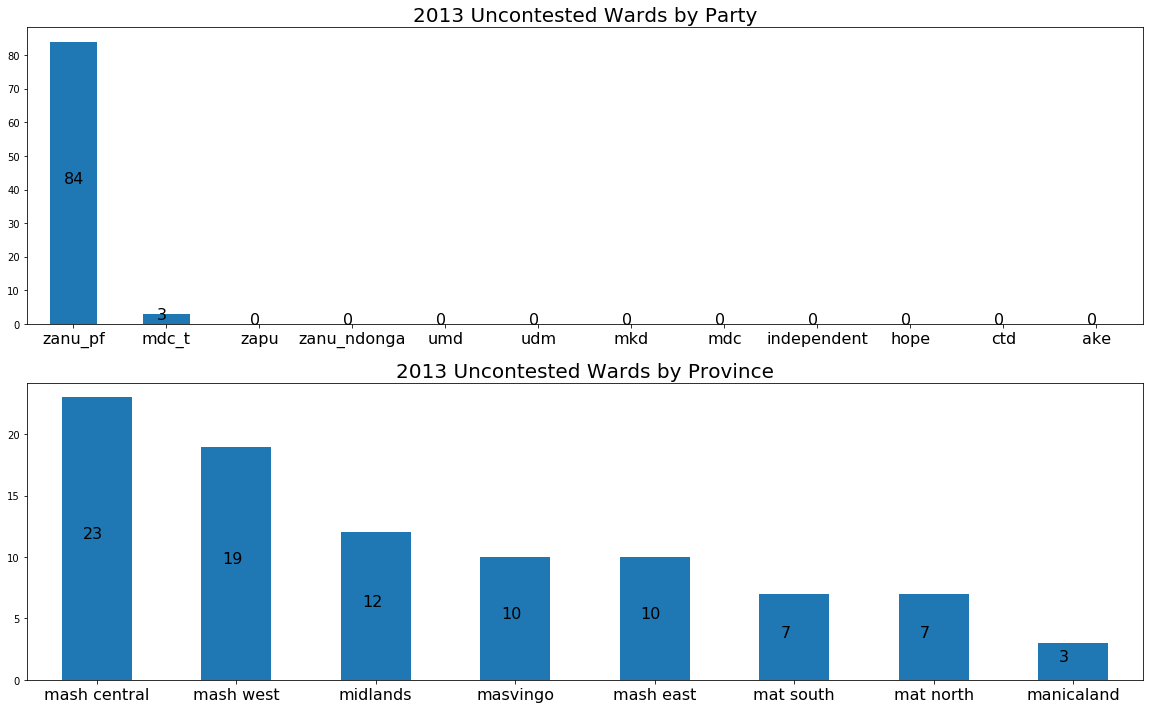

In [2096]:
f, axes = plt.subplots(2,1, figsize=(20,12))
# check out the uncontested areas by party
d1= uncontested[parties].sum().sort_values(ascending=False)
g1 = d1.plot(kind="bar", ax=axes[0],title= "2013 Uncontested Wards by Party")
g1.set_xticklabels(d1.index, rotation=0, fontsize=16);
for i in range(len(d1)):
    g1.text(i-0.1, d1[i]/2,  sep1000Formatter(d1[i]), fontsize=16)
g1.get_yaxis().set_major_formatter(tic.FuncFormatter(lambda x, p: format(int(x), ',')))
g1.title.set_size(20);

# check out the uncontested areas by province
d2= uncontested.province.value_counts()
g2 = d2.plot(kind="bar", ax=axes[1], title= "2013 Uncontested Wards by Province")
g2.set_xticklabels(d2.index, rotation=0, fontsize=16);
for i in range(len(d2)):
    g2.text(i-0.1, d2[i]/2,  sep1000Formatter(d2[i]), fontsize=16)
g2.get_yaxis().set_major_formatter(tic.FuncFormatter(lambda x, p: format(int(x), ',')))
g2.title.set_size(20)

### Now save the local authority 2013 votes data by ward

In [2097]:
contested.to_excel(TARGET+"2013localauthority_results_byward_contested.xlsx")
uncontested.to_excel(TARGET+"2013localauthority_results_byward_uncontested.xlsx")
dla.to_excel(TARGET+"2013localauthority_results_byward_all.xlsx")

------
## Check and Validate all 3 data sets: Presidential, Parliamentary & Local Authority
------

### Total Votes and Percentages

#### Presidential Summary

In [2098]:
rconcat.columns

Index(['province', 'local_authority', 'district', 'constituency', 'ward_no',
       'polling_station', 'facility', 'zapu', 'zanu_pf', 'zdp', 'mdc', 'mdc_t',
       'rejected', 'unaccounted_for', 'votes_cast', 'votes_valid'],
      dtype='object')

In [2099]:
rconcat.drop(['province', 'local_authority', 'district', 'constituency', 'ward_no',
       'polling_station', 'facility'], axis=1).sum().sort_values(ascending=False).apply(lambda x: sep1000Formatter(x))

votes_cast         3,479,666
votes_valid        3,410,361
zanu_pf            2,110,326
mdc_t              1,172,145
mdc                   92,571
rejected              69,302
zapu                  25,390
zdp                    9,932
unaccounted_for          528
dtype: object

In [2100]:
#Zanu, MDC-T, MDCs
topparties = ['zanu_pf', 'mdc_t', 'mdc']

print("\nPresidential, ALL VOTES CAST\n","--"*20 ,"\n", "Total Vote : ", sep1000Formatter(rconcat['votes_cast'].sum() ))
for x in topparties:
    print(x, " proportion: " , round(100*rconcat[x].sum()/rconcat['votes_cast'].sum(),2),
         "%", "\tVotes : ", sep1000Formatter(rconcat[x].sum()))
print("spoiled/rejected", "proportion: ", round(100*rconcat[['rejected', 'unaccounted_for']].sum().sum()/rconcat['votes_cast'].sum(),2),
         "%", "\tVotes : ", sep1000Formatter(rconcat[['rejected', 'unaccounted_for']].sum().sum()))

print("other", " proportion: " , round(100- 100*(rconcat[topparties].sum().sum()+rconcat[['rejected', 'unaccounted_for']].sum().sum())/rconcat['votes_cast'].sum(),2),
         "%", "\tVotes :", 
      sep1000Formatter(rconcat['votes_cast'].sum()-rconcat[topparties].sum().sum()-rconcat[['rejected', 'unaccounted_for']].sum().sum()))

print("\nPresidential, ONLY VALID VOTES\n","--"*20 ,"\n", "Total Vote : ", sep1000Formatter(rconcat['votes_valid'].sum()))
for x in topparties:
    print(x, " proportion: " , round(100*rconcat[x].sum()/rconcat['votes_valid'].sum(),2),
         "%", "\tVotes : ", sep1000Formatter(rconcat[x].sum()))
print("other", " proportion: " , round(100- 100*rconcat[topparties].sum().sum()/rconcat['votes_valid'].sum(),2),
         "%", "\tVotes :", sep1000Formatter(rconcat['votes_valid'].sum()-rconcat[topparties].sum().sum()))



Presidential, ALL VOTES CAST
 ---------------------------------------- 
 Total Vote :  3,479,666
zanu_pf  proportion:  60.65 % 	Votes :  2,110,326
mdc_t  proportion:  33.69 % 	Votes :  1,172,145
mdc  proportion:  2.66 % 	Votes :  92,571
spoiled/rejected proportion:  2.01 % 	Votes :  69,830
other  proportion:  1.0 % 	Votes : 34,794

Presidential, ONLY VALID VOTES
 ---------------------------------------- 
 Total Vote :  3,410,361
zanu_pf  proportion:  61.88 % 	Votes :  2,110,326
mdc_t  proportion:  34.37 % 	Votes :  1,172,145
mdc  proportion:  2.71 % 	Votes :  92,571
other  proportion:  1.04 % 	Votes : 35,319


#### Parliamentary Summary

In [2101]:
dpa.drop(['province',  'constituency'], axis=1).sum().sort_values(ascending=False).apply(lambda x: sep1000Formatter(x))

votes               3,378,377
zanu_pf             2,126,467
mdc_t               1,007,375
mdc                   158,273
independent            64,577
unknown_balance        13,895
zapu                   13,585
mkd                     6,766
umd                     1,500
fcz                     1,452
zanu_ndonga             1,066
mcd                       761
freezim_congress          419
ake                       380
pimz                      360
freedom_front             200
ctd                       147
zdp                       145
won_pct                   137
turnout                   119
pud                        76
zpm                        70
vp                         38
dtype: object

In [2102]:
#Zanu, MDC-T, MDCs
topparties = ['zanu_pf', 'mdc_t', 'mdc']

print("\Parliamentary, VOTES\n","--"*20 ,"\n", "Total Vote : ", sep1000Formatter(dpa['votes'].sum() ))
for x in topparties:
    print(x, " proportion: " , round(100*dpa[x].sum()/dpa['votes'].sum(),2),
         "%", "\tVotes : ", sep1000Formatter(dpa[x].sum()))
print("other", " proportion: " , round(100- 100*(dpa[topparties].sum().sum())/dpa['votes'].sum(),2),
         "%", "\tVotes :", 
      sep1000Formatter(dpa['votes'].sum()-dpa[topparties].sum().sum()))

\Parliamentary, VOTES
 ---------------------------------------- 
 Total Vote :  3,378,377
zanu_pf  proportion:  62.94 % 	Votes :  2,126,467
mdc_t  proportion:  29.82 % 	Votes :  1,007,375
mdc  proportion:  4.68 % 	Votes :  158,273
other  proportion:  2.55 % 	Votes : 86,262


#### Local Elections Summary

In [2103]:
dlasum.sum().sort_values(ascending=False).apply(lambda x: sep1000Formatter(x))

votes           3,244,751
zanu_pf         2,043,096
mdc_t           1,073,413
mdc                93,281
independent        21,935
zapu                9,286
contested           4,711
umd                 1,334
mkd                   969
ake                   530
zanu_ndonga           508
hope                  221
udm                   165
ctd                    13
not reported            0
grazing area            0
dtype: object

In [2104]:
#Zanu, MDC-T, MDCs
topparties = ['zanu_pf', 'mdc_t', 'mdc']
print("Local elections")
for x in topparties:
    print(x, " proportion: " , round(100*dlasum[x].sum()/dlasum['votes'].sum(),2),
         "%")
print("other", " proportion: " , round(100- 100*dlasum[topparties].sum().sum()/dlasum['votes'].sum(),2),
         "%")

Local elections
zanu_pf  proportion:  62.97 %
mdc_t  proportion:  33.08 %
mdc  proportion:  2.87 %
other  proportion:  1.08 %


### Validation Checks

#### Presidential validation

In [2105]:
chk_names

['count_candidate',
 'count_polling_station',
 'count_regvoters',
 'results_locauthority',
 'results_natassembly',
 'results_natassembly_women',
 'results_presidential',
 'wardlist']

In [2106]:
# check count of presidential candidates
chk['count_candidate']

,election_lvl,no_candidates
0,presidential,5
1,national assembly,842
2,local authorities,4827


In [2107]:
dv = chk['count_candidate'].copy()
non_candidate_cols= ['province', 'local_authority', 'district', 'constituency', 'ward_no',
       'polling_station', 'facility', 'rejected', 'unaccounted_for', 'votes_cast', 'votes_valid']
lc = set(rconcat.columns)-set(non_candidate_cols)
a = len(lc)
b = dv[dv['election_lvl']=='presidential']['no_candidates']

print("Candidates in presidential data = ", a, "listed as: ", list(cc))
print("Candidates in validation data = ", int(b))
a==b

Candidates in presidential data =  5 listed as:  ['zapu', 'zanu_pf', 'zdp', 'mdc', 'mdc_t']
Candidates in validation data =  5


0    True
Name: no_candidates, dtype: bool

In [2108]:
# polling stations duplicated
dv = chk['count_polling_station'].copy()
uniqps_cols =['province', 'local_authority', 'district', 'constituency',
                 'ward_no','polling_station', 'facility']
unq = rconcat.groupby(uniqps_cols).count().reset_index()
dc = unq.groupby('province').count().reset_index()[['province','polling_station']]
temp = pd.merge(dv, dc, how='left', left_on='province', right_on='province').rename(columns={
    'no_pol_station': 'polling_station (report)', 'polling_station': 'polling_station (pdf_list)'})
temp['difference']= temp['polling_station (pdf_list)'] - temp['polling_station (report)']
temp

,province,polling_station (report),polling_station (pdf_list),difference
0,bulawayo,392,391,-1
1,harare,875,874,-1
2,manicaland,1303,1303,0
3,mash central,822,822,0
4,mash east,1047,1047,0
5,mash west,1303,1300,-3
6,masvingo,1238,1234,-4
7,mat north,784,783,-1
8,mat south,623,620,-3
9,midlands,1348,1348,0


In [2109]:
# Extra ballots printed vs. registered voters (alleged)
d = chk['count_regvoters']
print("2013 Extra Ballots Analysis", "\n", "--"*20)
for p in d.province:
    a, b =d[d.province==p]['voter_pop'], d[d.province==p]['ballots_printed']
    print(p, ": ", "\n\tVoters= ", sep1000Formatter(a), "\n\tBallot= ",
          sep1000Formatter(b), "\n\tExtras= ", sep1000Formatter(b-a), "\n\tExtra% = ",sep1000Formatter(round(100*(b-a)/a,2)), "%\n")

2013 Extra Ballots Analysis 
 ----------------------------------------
bulawayo :  
	Voters=  320,598 
	Ballot=  434,200 
	Extras=  113,602 
	Extra% =  35 %

harare :  
	Voters=  826,274 
	Ballot=  1,119,400 
	Extras=  293,126 
	Extra% =  35 %

manicaland :  
	Voters=  849,499 
	Ballot=  1,160,200 
	Extras=  310,701 
	Extra% =  36 %

mash central :  
	Voters=  603,639 
	Ballot=  827,000 
	Extras=  223,361 
	Extra% =  37 %

mash east :  
	Voters=  724,402 
	Ballot=  989,300 
	Extras=  264,898 
	Extra% =  36 %

mash west :  
	Voters=  712,667 
	Ballot=  973,500 
	Extras=  260,833 
	Extra% =  36 %

masvingo :  
	Voters=  784,266 
	Ballot=  1,071,000 
	Extras=  286,734 
	Extra% =  36 %

mat north :  
	Voters=  398,018 
	Ballot=  547,100 
	Extras=  149,082 
	Extra% =  37 %

mat south :  
	Voters=  382,575 
	Ballot=  525,100 
	Extras=  142,525 
	Extra% =  37 %

midlands :  
	Voters=  839,219 
	Ballot=  1,146,400 
	Extras=  307,181 
	Extra% =  36 %



In [2110]:
# Check validate registered voters
dv = chk['count_regvoters'].copy()
dc = rconcat.groupby(['province']).sum()[['votes_cast','votes_valid']];dc
t = dv.join(dc, how='left', on="province")

print("2013 Presidential Voter Turnout and Valid Vote %", "\n", "--"*25)
for p in dv.province:
    vp, vc, vv =t[t.province==p]['voter_pop'], t[t.province==p]['votes_cast'], t[t.province==p]['votes_valid']
    print(p, ": ", "\n\tRegistered= ", sep1000Formatter(vp), "\n\tCast= ",
          sep1000Formatter(vc), "\n\tValid= ", sep1000Formatter(vv),
          "\n\tTurnout% = ",sep1000Formatter(round(100*(vc)/vp,2)), "%", 
         "\n\tValid% = ",sep1000Formatter(round(100*(vv)/vc,2)), "%\n")

2013 Presidential Voter Turnout and Valid Vote % 
 --------------------------------------------------
bulawayo :  
	Registered=  320,598 
	Cast=  133,303 
	Valid=  132,028 
	Turnout% =  41 % 
	Valid% =  99 %

harare :  
	Registered=  826,274 
	Cast=  449,305 
	Valid=  443,138 
	Turnout% =  54 % 
	Valid% =  98 %

manicaland :  
	Registered=  849,499 
	Cast=  467,932 
	Valid=  456,899 
	Turnout% =  55 % 
	Valid% =  97 %

mash central :  
	Registered=  603,639 
	Cast=  386,988 
	Valid=  380,310 
	Turnout% =  64 % 
	Valid% =  98 %

mash east :  
	Registered=  724,402 
	Cast=  426,853 
	Valid=  420,122 
	Turnout% =  58 % 
	Valid% =  98 %

mash west :  
	Registered=  712,667 
	Cast=  395,520 
	Valid=  387,788 
	Turnout% =  55 % 
	Valid% =  98 %

masvingo :  
	Registered=  784,266 
	Cast=  415,770 
	Valid=  405,966 
	Turnout% =  53 % 
	Valid% =  97 %

mat north :  
	Registered=  398,018 
	Cast=  203,124 
	Valid=  196,635 
	Turnout% =  51 % 
	Valid% =  96 %

mat south :  
	Registered=  382,575

##### Pres Overall, Rejected and Party Votes Results validations

In [2111]:
# overall votes
dv = chk['results_presidential'].reset_index().copy();#dv.set_index('province', inplace=True)
#dv.columns
dc = rconcat.groupby('province').sum().reset_index();
#dv.join(dc, how="left", on="province")
d = pd.merge(dv, dc, how= 'left', left_on="province", right_on="province", suffixes=[" (report)", " (excel)"]);d;

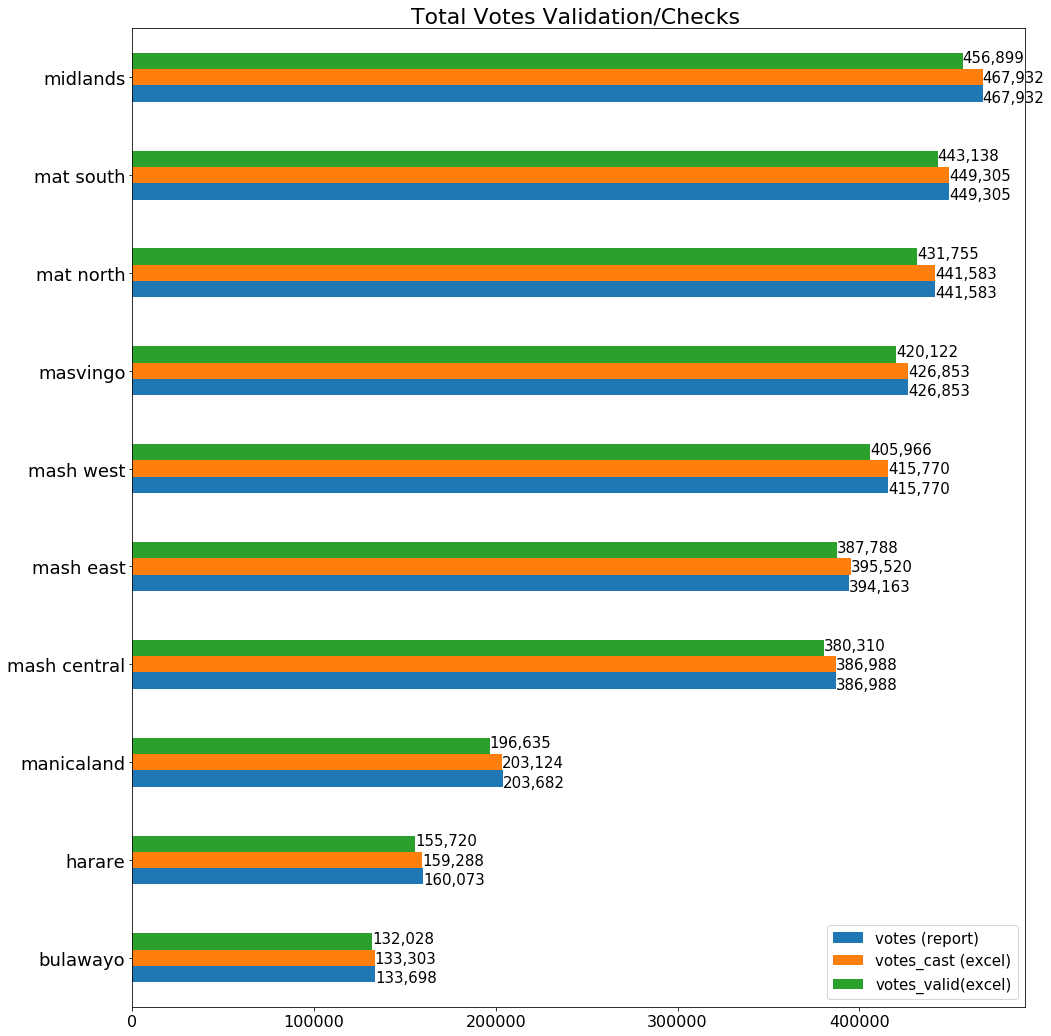

In [2112]:
d1 = d[['votes', 'votes_cast', 'votes_valid']].sort_values(by='votes'); d1.columns=["votes (report)", "votes_cast (excel)", "votes_valid(excel)"]
g1 = d1.plot(kind="barh", title="Total Votes Validation/Checks ", figsize=(16,18), fontsize=16)
g1.set_yticklabels(d.province,rotation=0, size=18)
g1.title.set_size(22)
g1.legend(fontsize=15)
for j in range(len(d1)):
    g1.text(d1.iloc[j,0], j-0.25,  sep1000Formatter(d1.iloc[j,0]), fontsize=15)
    g1.text(d1.iloc[j,1],  j-0.05, sep1000Formatter(d1.iloc[j,1]), fontsize=15)
    g1.text(d1.iloc[j,2],  j+0.15, sep1000Formatter(d1.iloc[j,2]), fontsize=15)

In [2113]:
#Bulawayo, Mash West, Mat North and Mat South are off

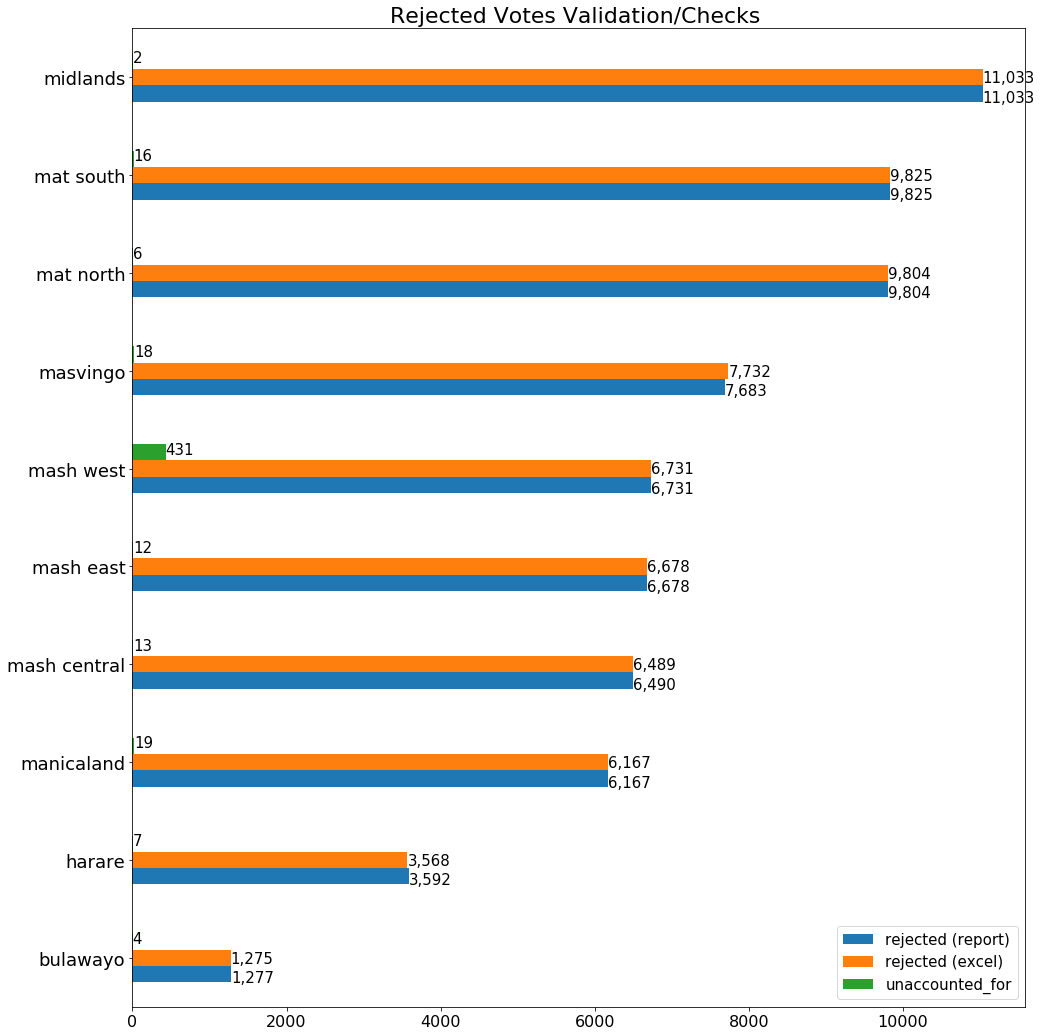

In [2114]:
d1 = d[['rejected (report)', 'rejected (excel)', 'unaccounted_for']].sort_values(by='rejected (report)');
g1 = d1.plot(kind="barh", title="Rejected Votes Validation/Checks ", figsize=(16,18), fontsize=16)
g1.set_yticklabels(d.province,rotation=0, size=18)
g1.title.set_size(22)
g1.legend(fontsize=15)
for j in range(len(d1)):
    g1.text(d1.iloc[j,0], j-0.25,  sep1000Formatter(d1.iloc[j,0]), fontsize=15)
    g1.text(d1.iloc[j,1],  j-0.05, sep1000Formatter(d1.iloc[j,1]), fontsize=15)
    g1.text(d1.iloc[j,2],  j+0.15, sep1000Formatter(d1.iloc[j,2]), fontsize=15)

In [2115]:
def plotPartyValidCharts(party_name):
    """ Takes party as a keword and returns plot of validation chart for each province"""
    pty = party_name
    # define the main data in this context
    dv = chk['results_presidential'].reset_index().copy();
    dc = rconcat.groupby('province').sum().reset_index();
    d = pd.merge(dv, dc, how= 'left', left_on="province", right_on="province", suffixes=[" (report)", " (excel)"]);d;
    
    # preprocess and plot
    d1 = d[[c for c in d.columns if pty in c]] ; d1=d1.sort_values(by=d1.columns[0]); 
    g1 = d1.plot(kind="barh", title= pty.upper() + " Presidential Votes Validation/Checks ", figsize=(18,15), fontsize=16)
    g1.set_yticklabels(d.province,rotation=0, size=18)
    g1.title.set_size(22)
    g1.legend(fontsize=16)
    for j in range(len(d1)):
        g1.text(d1.iloc[j,0], j-0.2,  sep1000Formatter(d1.iloc[j,0]), fontsize=15)
        g1.text(d1.iloc[j,1],  j+0.1, sep1000Formatter(d1.iloc[j,1]), fontsize=15)

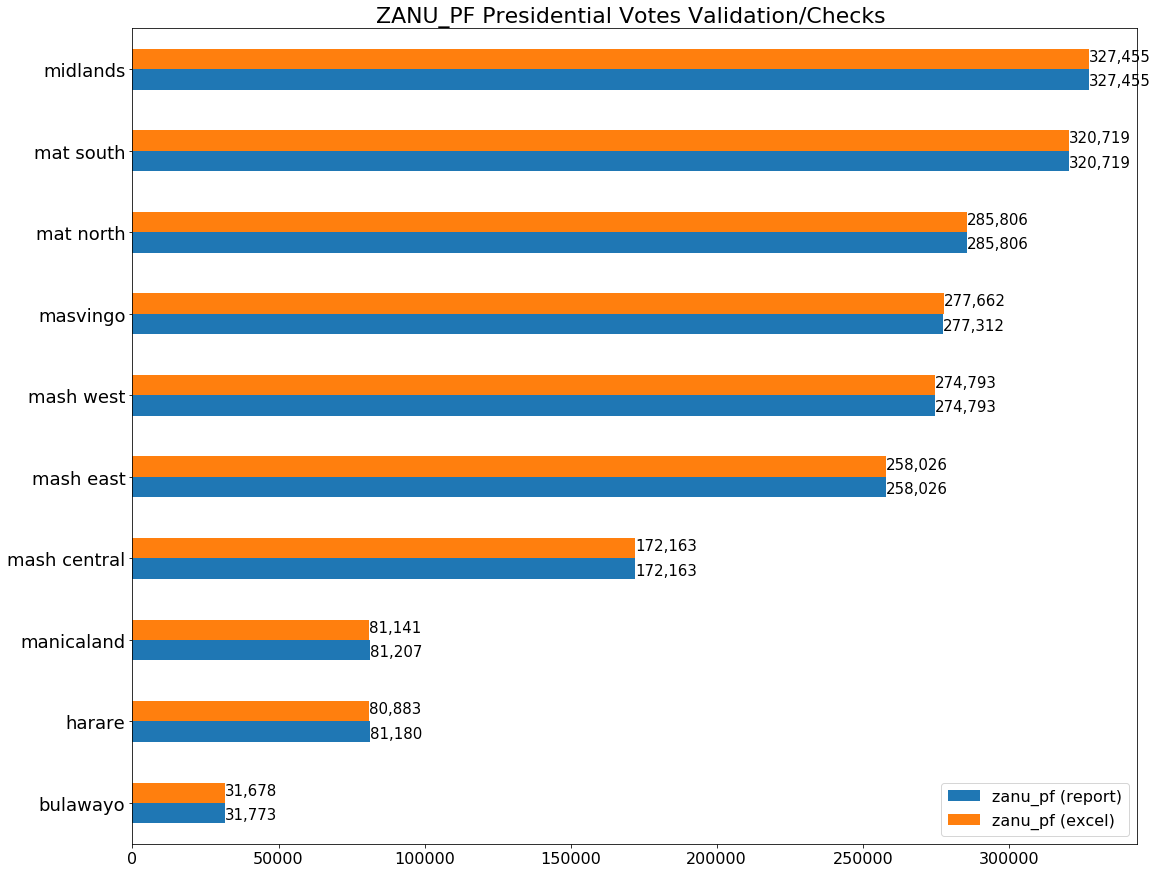

In [2116]:
pty = 'zanu_pf'
plotPartyValidCharts(pty)

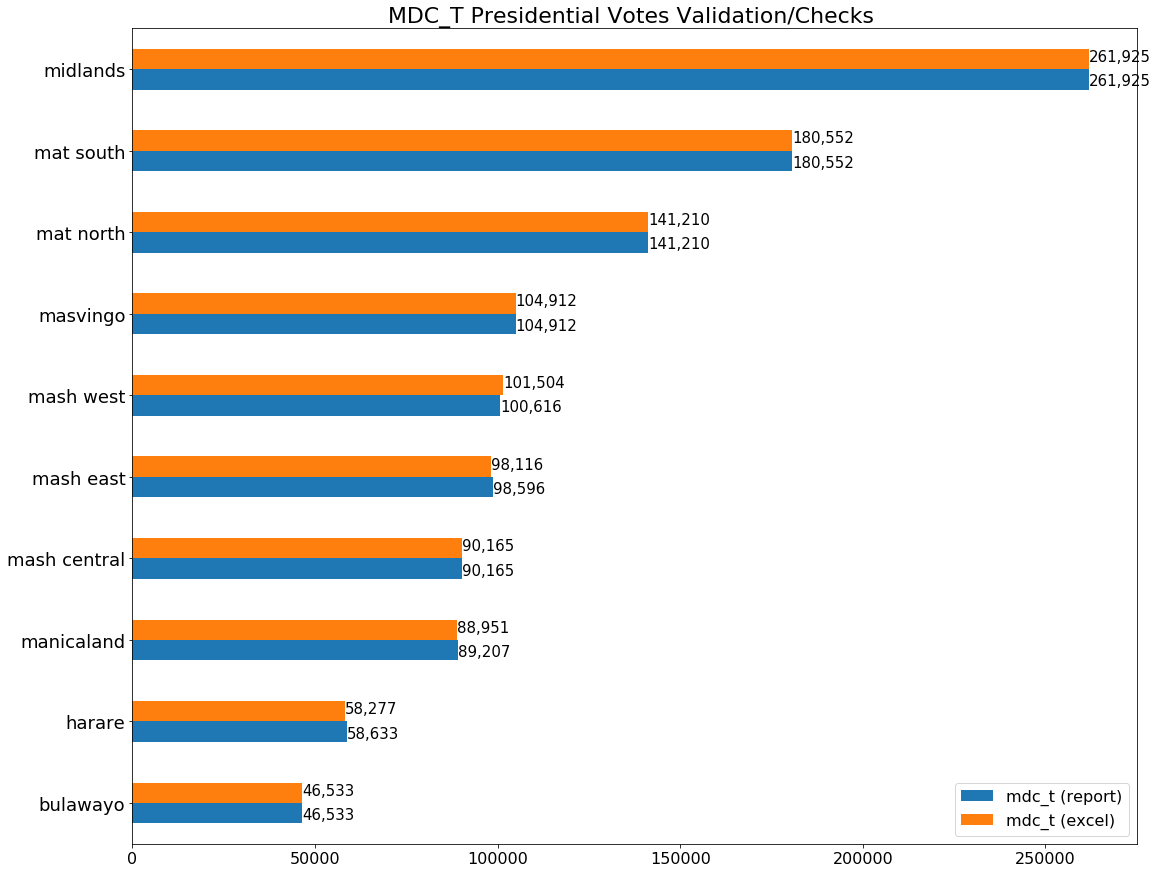

In [2117]:
pty = 'mdc_t'
plotPartyValidCharts(pty)

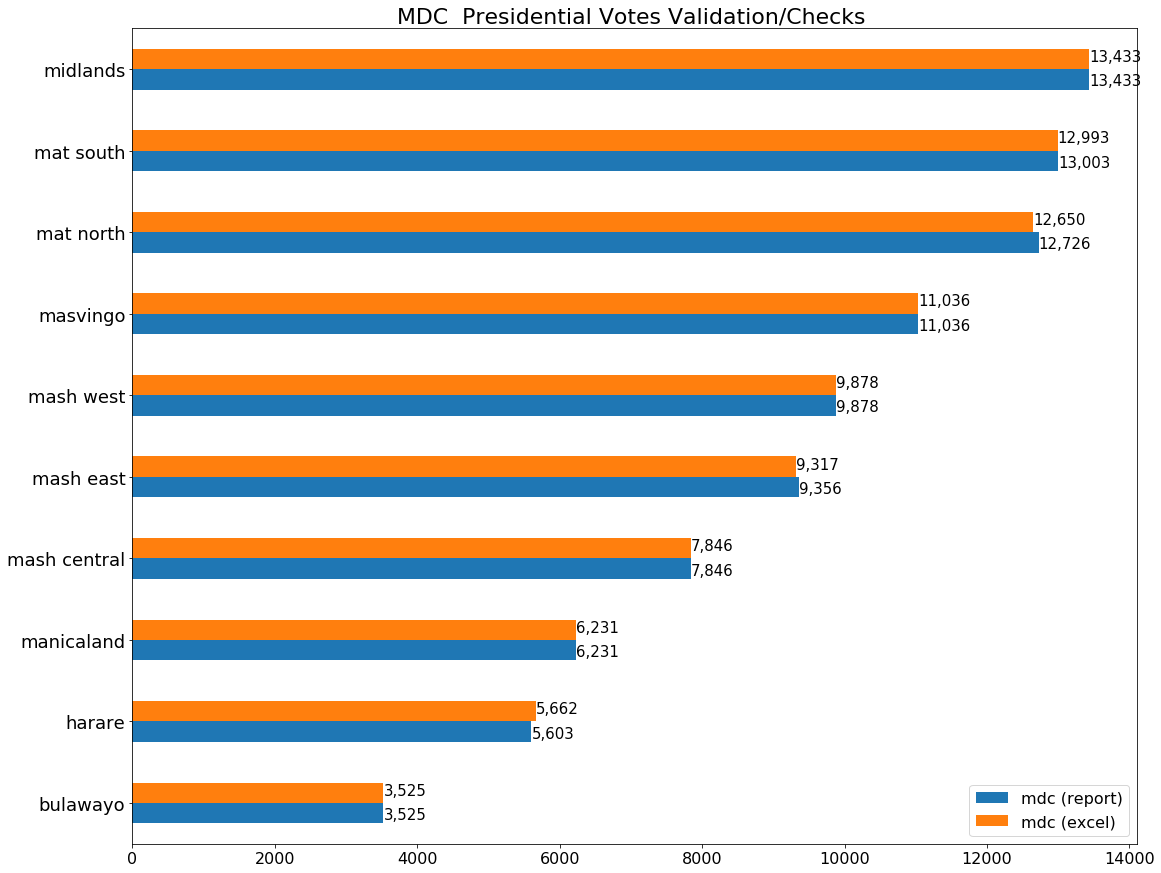

In [2118]:
pty = 'mdc '
plotPartyValidCharts(pty)

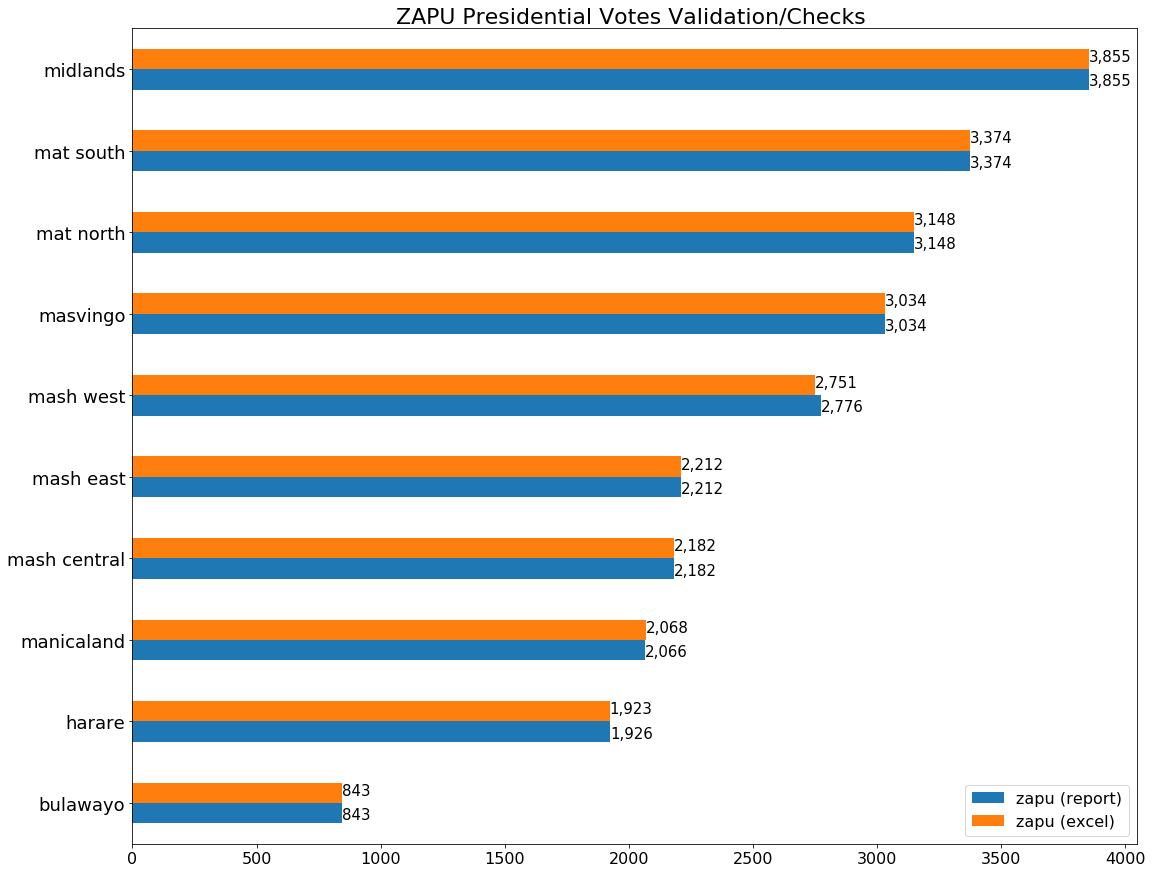

In [2119]:
pty = 'zapu'
plotPartyValidCharts(pty)

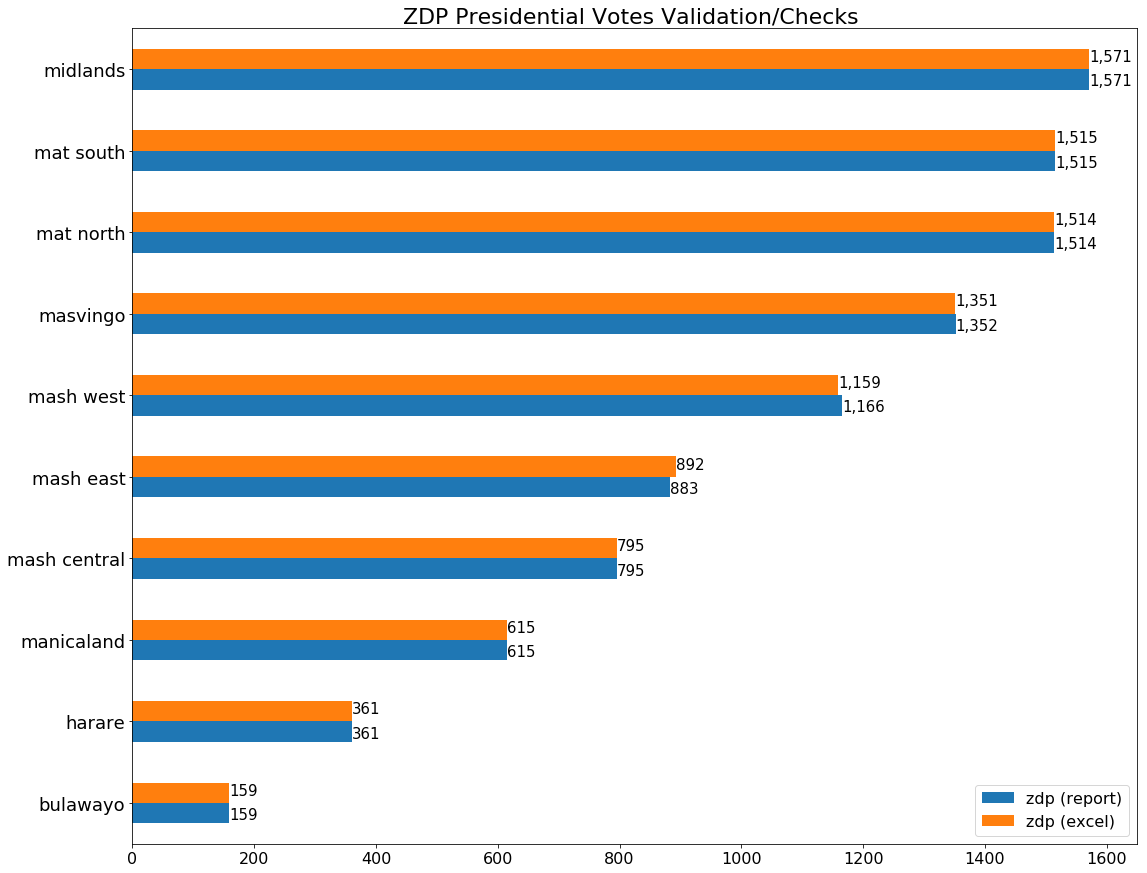

In [2120]:
pty = 'zdp'
plotPartyValidCharts(pty)

- Different variances across parites
- Not the same variances across the provinces for summary data!

In [2121]:
chk.keys()

dict_keys(['count_candidate', 'count_polling_station', 'count_regvoters', 'results_locauthority', 'results_natassembly', 'results_natassembly_women', 'results_presidential', 'wardlist'])

#### Parliamentary validation

In [2122]:
len(set(dpa.constituency))

209

- Missing one constituency - Chirumanzu

In [2123]:
# Check validate registered voters, parly
dv = chk['count_regvoters'].copy()
dc = dpa.groupby(['province']).sum()['votes'];dc;
t = dv.join(dc, how='left', on="province")

print("2013 Parliamentary Voter Turnout %", "\n", "--"*25)
for p in dv.province:
    vp, vv =t[t.province==p]['voter_pop'], t[t.province==p]['votes']
    print(p, ": ", "\n\tRegistered= ", sep1000Formatter(vp),  "\n\tParly Votes= ", sep1000Formatter(vv),
          "\n\tTurnout% = ",sep1000Formatter(round(100*(vv)/vp,2)),"%\n")


2013 Parliamentary Voter Turnout % 
 --------------------------------------------------
bulawayo :  
	Registered=  320,598 
	Parly Votes=  130,594 
	Turnout% =  40 %

harare :  
	Registered=  826,274 
	Parly Votes=  423,854 
	Turnout% =  51 %

manicaland :  
	Registered=  849,499 
	Parly Votes=  455,795 
	Turnout% =  53 %

mash central :  
	Registered=  603,639 
	Parly Votes=  380,880 
	Turnout% =  63 %

mash east :  
	Registered=  724,402 
	Parly Votes=  419,308 
	Turnout% =  57 %

mash west :  
	Registered=  712,667 
	Parly Votes=  388,851 
	Turnout% =  54 %

masvingo :  
	Registered=  784,266 
	Parly Votes=  406,352 
	Turnout% =  51 %

mat north :  
	Registered=  398,018 
	Parly Votes=  195,273 
	Turnout% =  49 %

mat south :  
	Registered=  382,575 
	Parly Votes=  156,129 
	Turnout% =  40 %

midlands :  
	Registered=  839,219 
	Parly Votes=  421,341 
	Turnout% =  50 %



In [2124]:
pty = party_name = 'zanu_pf'
# define the main data in this context
dv = chk['results_natassembly'].reset_index().copy();
dc = dpa.groupby('province').sum().reset_index();
d = pd.merge(dv, dc, how= 'left', left_on="province", right_on="province", suffixes=[" (report)", " (excel)"]);d

,index,province,zanu_pf (report),mdc_t (report),independent (report),won_pct,turnout,votes,mdc_t (excel),zanu_pf (excel),...,fcz,pud,pimz,zdp,freedom_front,vp,freezim_congress,mcd,ctd,unknown_balance
0,0,bulawayo,0,12,0.0,6.740800,5.27,130594,72693.0,30290,...,1108.0,76.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,662.0
1,1,harare,6,23,0.0,17.523600,15.32,423854,224285.0,169272,...,34.0,0.0,41.0,29.0,200.0,38.0,0.0,761.0,0.0,318.0
2,2,manicaland,22,4,0.0,14.859900,15.39,455795,163969.0,263856,...,0.0,0.0,0.0,0.0,0.0,0.0,130.0,0.0,0.0,3945.0
3,3,mash central,18,0,0.0,15.208000,12.81,380880,37040.0,335895,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,mash east,22,0,1.0,17.246600,14.47,419308,69671.0,316317,...,0.0,0.0,0.0,0.0,0.0,0.0,289.0,0.0,0.0,733.0
5,5,mash west,21,1,0.0,15.616000,14.08,388851,86948.0,281262,...,0.0,0.0,221.0,116.0,0.0,0.0,0.0,0.0,0.0,1293.0
6,6,masvingo,26,0,0.0,18.299147,14.42,406352,94059.0,290138,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6350.0
7,7,mat north,7,6,0.0,6.785770,7.07,195273,88132.0,82764,...,310.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,147.0,0.0
8,8,mat south,13,0,0.0,6.732900,5.90,156129,49095.0,81582,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,411.0
9,9,midlands,25,3,0.0,18.148761,15.16,421341,121483.0,275091,...,0.0,0.0,98.0,0.0,0.0,0.0,0.0,0.0,0.0,183.0


In [2125]:
dc= dpa.set_index(['province', 'constituency', 'won_pct', 'turnout', 'votes']
                 ).stack().reset_index().rename(columns={
    'level_5':'party', 0:'votes_party', 'votes': 'votes_total'}); dc
idx_winners = dc.groupby(['province', 'constituency'])['votes_party'].transform(max)==dc['votes_party']
dcmps = dc[idx_winners]

In [2126]:
print("Total seats by party from Excel\n------------------\n")
dcmps["party"].value_counts()

Total seats by party from Excel
------------------



zanu_pf        159
mdc_t           48
independent      2
Name: party, dtype: int64

In [2127]:
print("Total seats by party from Report\n------------------\n")
dv[['zanu_pf', 'mdc_t','independent']].sum()

Total seats by party from Report
------------------



zanu_pf        160.0
mdc_t           49.0
independent      1.0
dtype: float64

In [2128]:
def plotPartyValidChartsParly(party_name):
    """ Takes party as a keword and returns plot of validation chart for each province"""
    pty = party_name
    # define the main data in this context
    dc= dpa.set_index(['province', 'constituency', 'won_pct', 'turnout', 'votes']
                 ).stack().reset_index().rename(columns={
    'level_5':'party', 0:'votes_party', 'votes': 'votes_total'}); dc
    idx_winners = dc.groupby(['province', 'constituency'])['votes_party'].transform(max)==dc['votes_party']
    dcmps = dc[idx_winners]
    dcprov = pd.get_dummies(data=dcmps, columns=['party']).groupby(['province']).sum()
    d= pd.merge(dv, dcprov.iloc[:,4:].reset_index());d;

   
    # preprocess and plot
    d1 = d[[c for c in d.columns if pty in c]] ; d1=d1.sort_values(by=d1.columns[0]); 
    g1 = d1.plot(kind="barh", title= pty.upper() + " Parliamentary Seats Validation/Checks ", figsize=(10,8), fontsize=16)
    g1.set_yticklabels(d.province,rotation=0, size=18)
    g1.title.set_size(22)
    g1.legend(fontsize=16)
    for j in range(len(d1)):
        g1.text(d1.iloc[j,0], j-0.2,  sep1000Formatter(d1.iloc[j,0]), fontsize=15)
        g1.text(d1.iloc[j,1],  j+0.1, sep1000Formatter(d1.iloc[j,1]), fontsize=15)

- Midlands and BUlawayo Parliamentary have different allocations

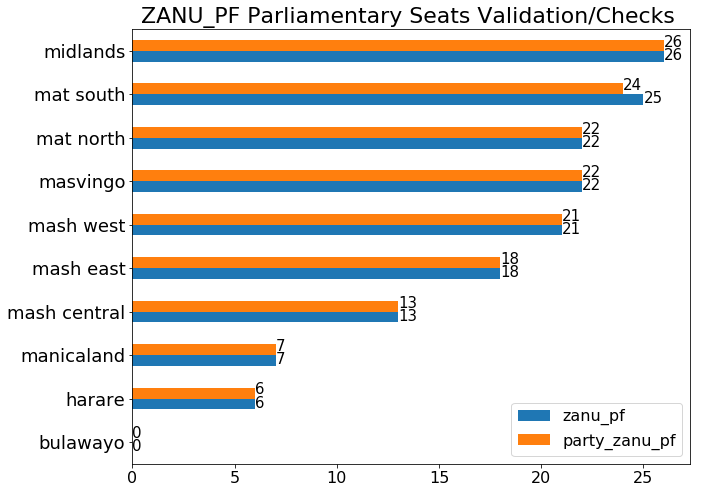

In [2129]:
plotPartyValidChartsParly('zanu_pf')

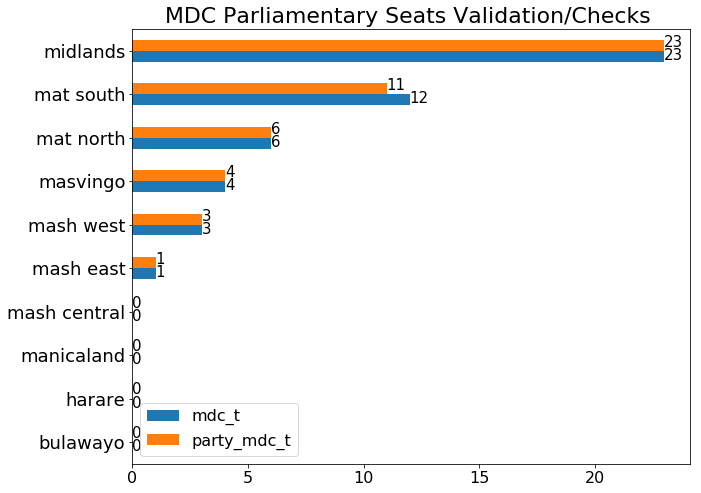

In [2130]:
plotPartyValidChartsParly('mdc')

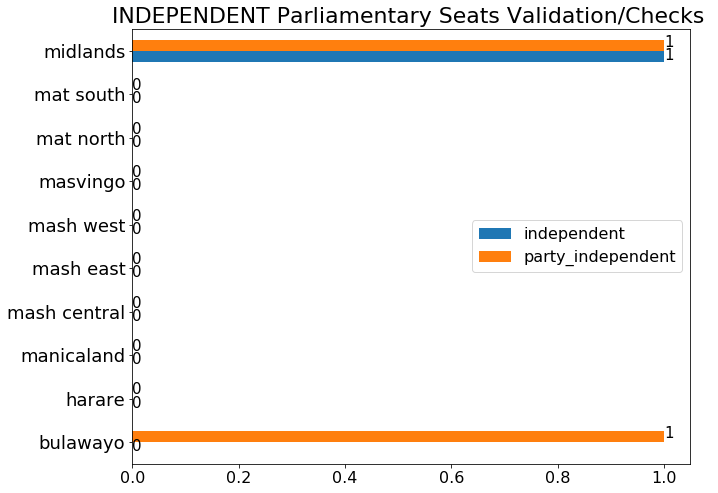

In [2131]:
plotPartyValidChartsParly('independent')

#### Local authority validation

In [2132]:
chk["wardlist"].count()

local_authority    4822
ward               4822
candidate_srn      4822
dtype: int64

In [2133]:
chk["count_candidate"]

,election_lvl,no_candidates
0,presidential,5
1,national assembly,842
2,local authorities,4827


- missing 5 candidates, maybe there were bi-elections in some areas?

In [2134]:
# Internal consistency first! check the local authorities
vset1 = set(chk['wardlist']['local_authority'])
cset1 = set(dla['local_authority'])

In [2135]:
cset1 == vset1

True

- the local authorities are the same, validated with separately compiled data

In [2136]:
# Internal consistency first! Check the wards
vstr = chk['wardlist']['local_authority'] + chk['wardlist']['ward'].apply(lambda x: str(x))
cstr = dla['local_authority'] + dla['ward_no'].apply(lambda x: str(x))

In [2137]:
vset2 = set(vstr)
cset2 = set(cstr)

In [2138]:
print("Number of wards missed= ", len(vset2-cset2),"\n\t",(vset2-cset2) )
""" UPON CHECKING THE FOLLOWING WARDS WERE MISSING IN FIRST DATA EXTRACTION
----------------------------------------------------------------------------
{'bulilima rdc17',
 'chiredzi rdc9',
 'hurungwe rdc19',
 'hurungwe rdc2',
 'hurungwe rdc3',
 'makonde rdc19',
 'makonde rdc2',
 'makonde rdc4',
 'makonde rdc6',
 'makonde rdc8',
 'matobo rdc20',
 'pfura rdc32',
 'sanyati rdc5',
 'sanyati rdc7',
 'vic. falls municipality9',
 'zaka rdc3',
 'zaka rdc4',
 'zaka rdc5',
 'zaka rdc6',
 'zvimba rdc1',
 'zvimba rdc12',
 'zvimba rdc18',
 'zvimba rdc2',
 'zvimba rdc28',
 'zvimba rdc30'}
 -----------------------------------------------------------
"""
print("\n-----\n SECOND CHECK, FIXED THE MISSING WARDS!")

Number of wards missed=  0 
	 set()

-----
 SECOND CHECK, FIXED THE MISSING WARDS!


In [2139]:
cset2-vset2

set()

In [2140]:
chk.keys()

dict_keys(['count_candidate', 'count_polling_station', 'count_regvoters', 'results_locauthority', 'results_natassembly', 'results_natassembly_women', 'results_presidential', 'wardlist'])

In [2141]:
set(dc.province)==set(dv.province)

True

In [2142]:
# Check validate registered voters, local authorities
dv = chk['count_regvoters'].copy()
dc = contested.groupby(['province']).sum().reset_index()[['province', 'votes']]; dc;
t = pd.merge(dv, dc, how='left', left_on="province", right_on="province")

print("2013 Local Elections Voter Turnout %", "\n", "--"*25)
for p in dv.province:
    vp, vv =t[t.province==p]['voter_pop'], t[t.province==p]['votes']
    print(p, ": ", "\n\tRegistered= ", sep1000Formatter(vp),  "\n\tParly Votes= ", sep1000Formatter(vv),
          "\n\tTurnout% = ",sep1000Formatter(round(100*(vv)/vp,2)),"%\n")


2013 Local Elections Voter Turnout % 
 --------------------------------------------------
bulawayo :  
	Registered=  320,598 
	Parly Votes=  131,579 
	Turnout% =  41 %

harare :  
	Registered=  826,274 
	Parly Votes=  431,930 
	Turnout% =  52 %

manicaland :  
	Registered=  849,499 
	Parly Votes=  448,676 
	Turnout% =  52 %

mash central :  
	Registered=  603,639 
	Parly Votes=  341,244 
	Turnout% =  56 %

mash east :  
	Registered=  724,402 
	Parly Votes=  401,716 
	Turnout% =  55 %

mash west :  
	Registered=  712,667 
	Parly Votes=  340,383 
	Turnout% =  47 %

masvingo :  
	Registered=  784,266 
	Parly Votes=  389,062 
	Turnout% =  49 %

mat north :  
	Registered=  398,018 
	Parly Votes=  192,835 
	Turnout% =  48 %

mat south :  
	Registered=  382,575 
	Parly Votes=  152,276 
	Turnout% =  39 %

midlands :  
	Registered=  839,219 
	Parly Votes=  415,050 
	Turnout% =  49 %



In [2181]:
def plotPartyValidChartsLocal(party_name):
    """ Takes party as a keword and returns plot of validation chart for each province"""
    pty = party_name
    # define the main data in this context
    dv = chk['results_locauthority'].copy();
    dc= contested.set_index(['province', 'local_authority', 'ward_no','contested',
              'votes']
                 ).stack().reset_index().rename(columns={
    'level_5':'party', 0:'votes_party', 'votes': 'votes_total'}); dc; 
    
    idx_winners = dc.groupby(['province', 'local_authority',
                              'ward_no'])['votes_party'].transform(max)==dc['votes_party']
    dccons = dc[idx_winners]
    dcprov = pd.get_dummies(data=dccons, columns=['party']).groupby(['province']).sum().reset_index()
    dcprov.columns = [x.replace("party_", "") for x in dcprov.columns]
    d= pd.merge(dv, dcprov, left_on='province', right_on='province', suffixes=[" (report)", " (excel)"]);d;

    # preprocess and plot
    d1 = d[[c for c in d.columns if pty in c]] ; d1=d1.sort_values(by=d1.columns[0]); 
    #print(d1.isnull())
    g1 = d1.plot(kind="barh", title= pty.upper() + " Local Authority Seats Validation/Checks ", figsize=(10,8), fontsize=16)
    g1.set_yticklabels(d['province'],rotation=0, size=18)
    g1.title.set_size(22)
    g1.legend(fontsize=16)
    for j in range(len(d1)):
        g1.text(d1.iloc[j,0], j-0.2,  sep1000Formatter(d1.iloc[j,0]), fontsize=15)
        try:
            g1.text(d1.iloc[j,1],  j+0.1, sep1000Formatter(d1.iloc[j,1]), fontsize=15)
        except:
            pass

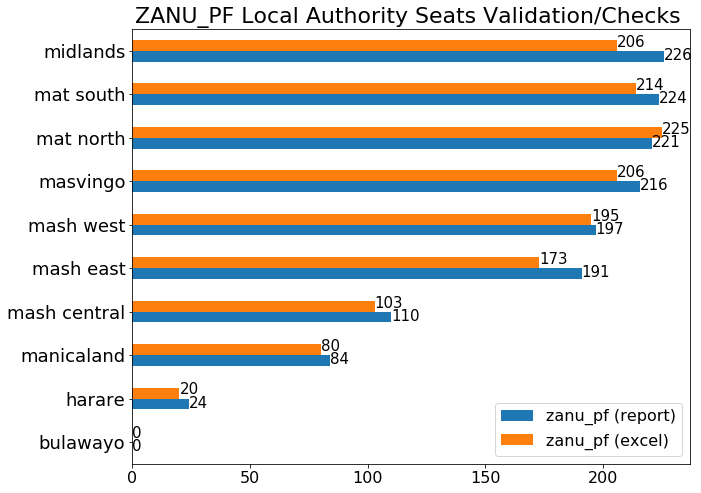

In [2182]:
pty = 'zanu_pf'
plotPartyValidChartsLocal(pty)

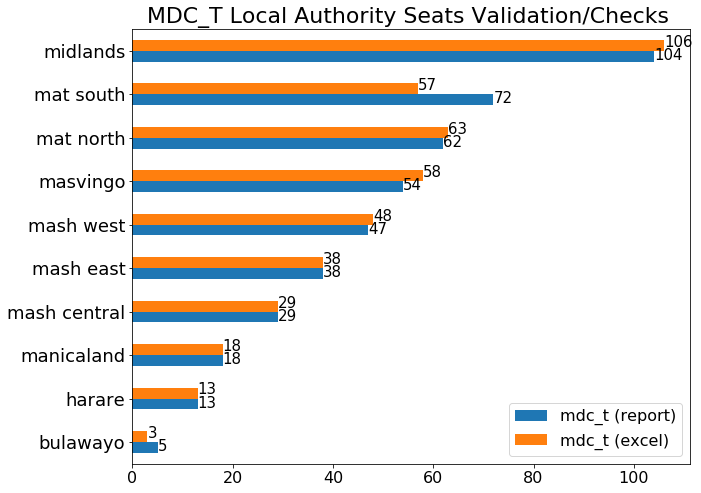

In [2183]:
pty = 'mdc_t'
plotPartyValidChartsLocal(pty)

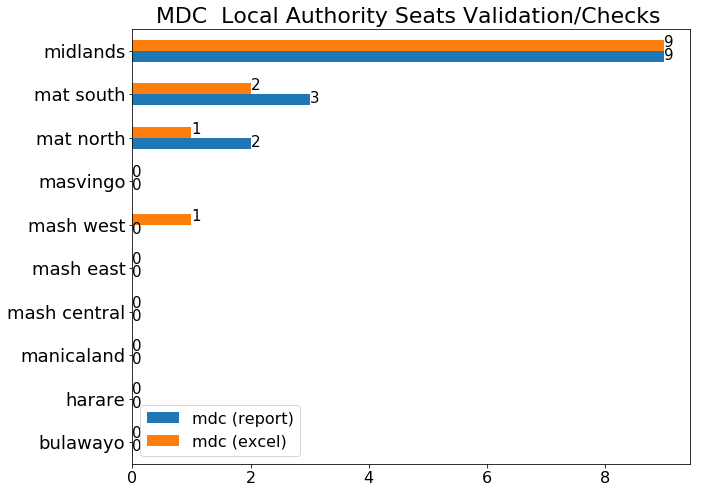

In [2184]:
pty = 'mdc '
plotPartyValidChartsLocal(pty)

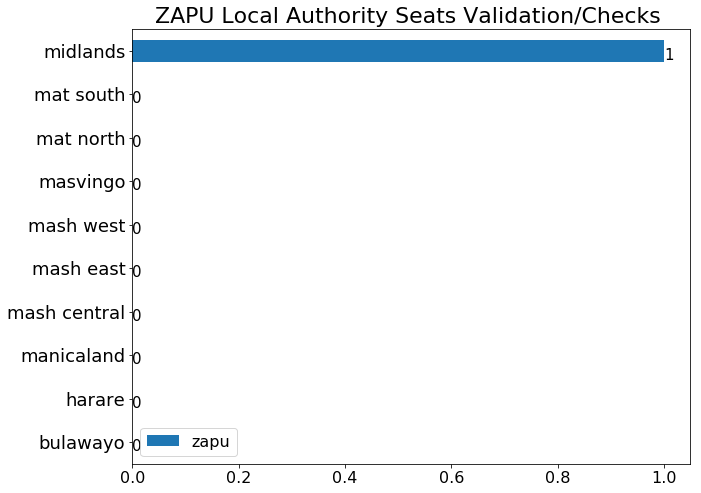

In [2185]:
pty = 'zapu'
plotPartyValidChartsLocal(pty)

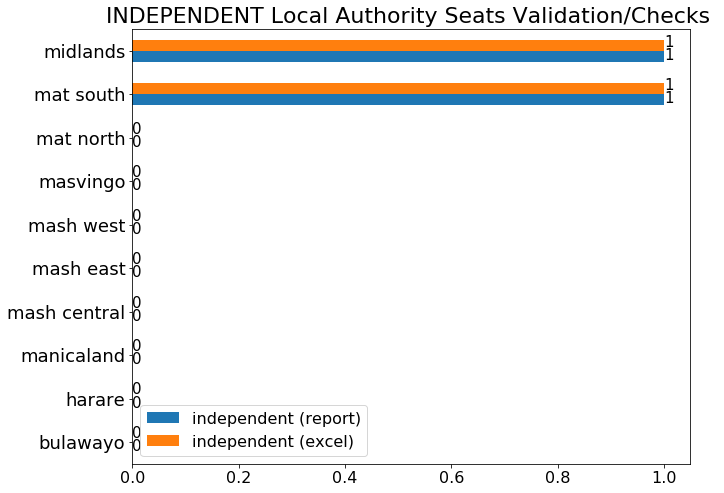

In [2186]:
pty = 'independent'
plotPartyValidChartsLocal(pty)

### 2013 Voter Turnout Across All Harmonized Elections

In [2300]:
dpa.groupby(['province']).sum();

In [2301]:
# Make dataframes for harmonized election levels
dv = chk['count_regvoters'].set_index('province').copy() 
dr = rconcat.groupby(['province']).sum()[['votes_cast', 'votes_valid']]
dp = dpa.groupby(['province']).sum().reset_index()[['province', 'votes']].set_index('province')
dl = contested.groupby(['province']).sum().reset_index()[['province', 'votes']].set_index('province')

In [2302]:
# join the election turonout and volumes together
dvto = pd.concat([dv, dr, dp, dl], axis=1, keys=['reg', 'pres', 'parly', 'local'])
dvto.columns = [x[0]+"_"+x[1] for x in list(zip(dvto.columns.get_level_values(0), dvto.columns.get_level_values(1)))]
dvto.sort_values(by="pres_votes_cast",ascending=True, inplace=True)
#dvto =dvto[['pres_votes_cast', 'pres_votes_valid', 'parly_votes', 'local_votes']]

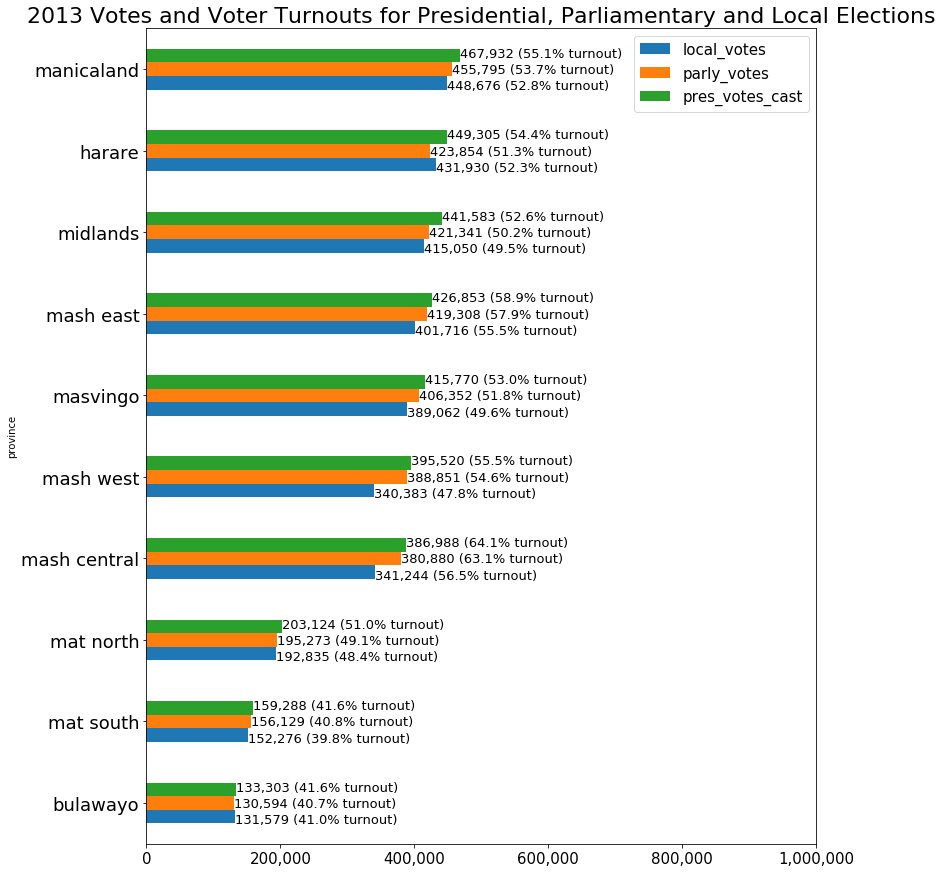

In [2338]:
# plot the voter turnouts
rt, rv= dvto.pres_votes_cast/dvto.reg_voter_pop,dvto.pres_votes_cast 
pt, pv = dvto.parly_votes/dvto.reg_voter_pop ,  dvto.parly_votes 
lt, lv = dvto.local_votes/dvto.reg_voter_pop , dvto.local_votes

d=dvto[['local_votes','parly_votes', 'pres_votes_cast']]
g=d.plot(
    kind="barh", title="2013 Votes and Voter Turnouts for Presidential, Parliamentary and Local Elections", 
                     figsize=(12,15) ,  fontsize=15);
g.set_xlim(0,1000000)

g.set_yticklabels(d.index,rotation=0, size=18)
g.title.set_size(22)
g.legend(fontsize=15)
for j in range(len(d)):
    g.text(d.iloc[j,0], j-0.25,  
           sep1000Formatter(d.iloc[j,0])+" ("+str(round(lt[j]*100, 1))+"%"+" turnout)", fontsize=13)
    g.text(d.iloc[j,1],  j-0.05, 
           sep1000Formatter(d.iloc[j,1])+" ("+str(round(pt[j]*100, 1))+"%"+" turnout)", fontsize=13)
    g.text(d.iloc[j,2],  j+0.15,
           sep1000Formatter(d.iloc[j,2])+" ("+str(round(rt[j]*100, 1))+"%"+" turnout)", fontsize=13)

g.get_xaxis().set_major_formatter(tic.FuncFormatter(lambda x, p: format(int(x), ',')))

In [2418]:
# Vote differences between the election levels
dvto['parly_pres_diff'] = dvto['pres_votes_cast'] - dvto['parly_votes']
dvto['local_parly_diff'] = dvto['parly_votes'] - dvto['local_votes']
dvto['local_pres_diff'] = dvto['pres_votes_cast']-dvto['local_votes']

dvto['parly_pres_pct'] = 1-dvto['parly_votes']/dvto['pres_votes_cast']
dvto['local_parly_pct'] = 1-dvto['local_votes']/dvto['parly_votes'] 
dvto['local_pres_pct'] = 1- dvto['local_votes']/dvto['pres_votes_cast']


Total/sum of variances 
 ---------------------------------------- 
 local_pres_diff     234,915
local_parly_diff    133,626
parly_pres_diff     101,289
dtype: object 
 ---------------------------------------- 



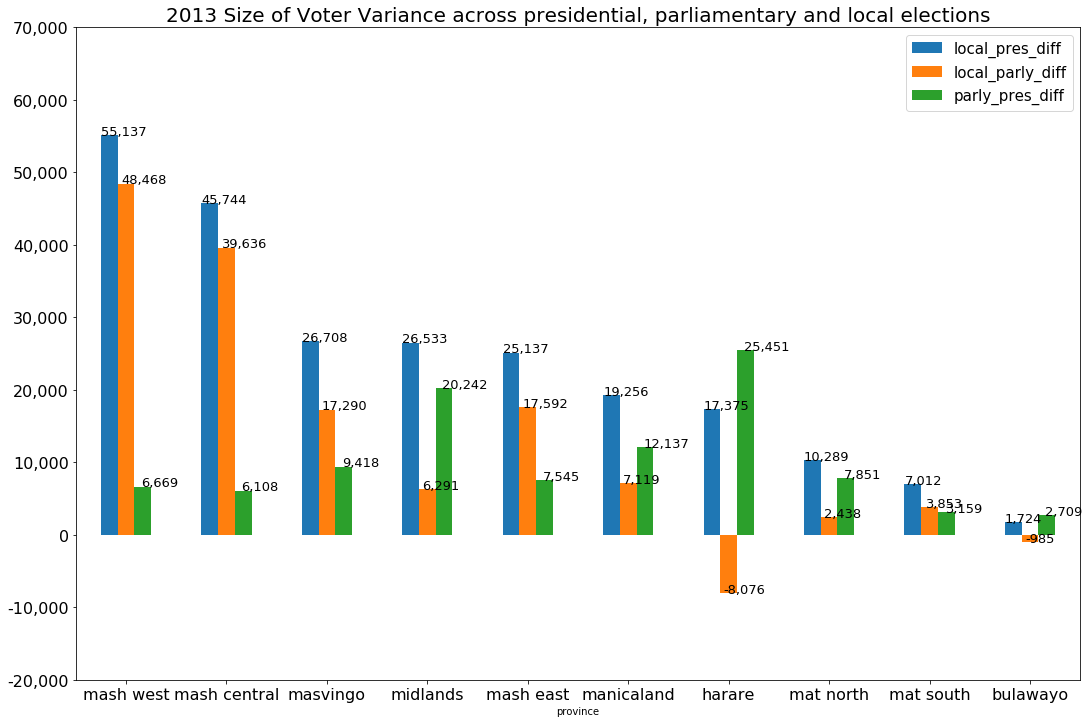

In [2431]:
d=dvto[[c for c in dvto.columns if 'diff' in c][::-1]].sort_values(by="local_pres_diff", ascending=False)
print("\nTotal/sum of variances \n","--"*20,  "\n"  ,
      d.sum().apply(lambda x: sep1000Formatter(x)) ,
      "\n" ,   "--"*20    , "\n"   )
g = d.plot(kind="bar", title="2013 Size of Voter Variance across presidential, parliamentary and local elections",
          figsize=(18,12), fontsize=16)
g.set_ylim(-20000,70000)

g.set_xticklabels(d.index,rotation=0, size=16)
g.title.set_size(20)
g.legend(fontsize=15)
g.get_yaxis().set_major_formatter(tic.FuncFormatter(lambda x, p: format(int(x), ',')))
for j in range(len(d)):
    g.text(j-0.25, d.iloc[j,0],sep1000Formatter(d.iloc[j,0]), fontsize=13)
    g.text( j-0.05, d.iloc[j,1], sep1000Formatter(d.iloc[j,1]), fontsize=13)
    g.text(j+0.15,d.iloc[j,2] ,sep1000Formatter(d.iloc[j,2]), fontsize=13)

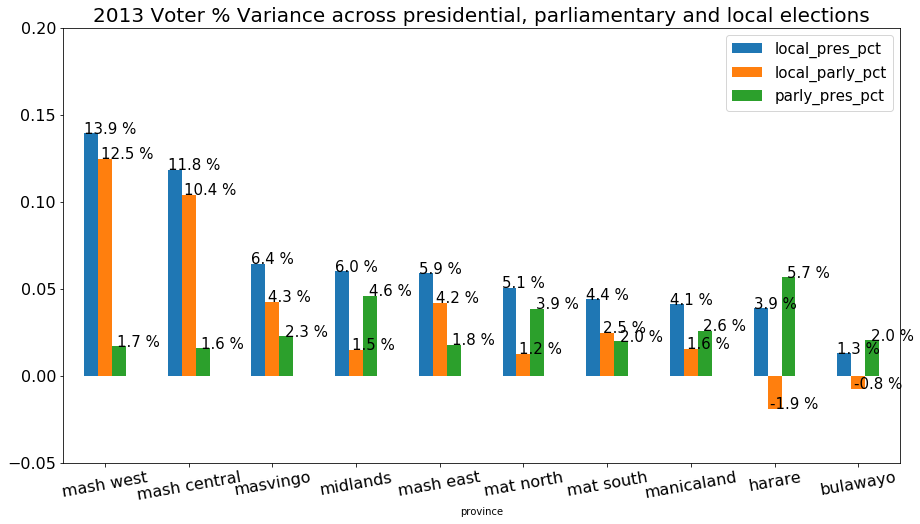

In [2435]:
d=dvto[[c for c in dvto.columns if 'pct' in c][::-1]].sort_values(by="local_pres_pct", ascending=False)
g = d.plot(kind="bar",
           title="2013 Voter % Variance across presidential, parliamentary and local elections",
          figsize=(15,8), fontsize=16)
g.set_ylim(-0.05,0.2)

g.set_xticklabels(d.index,rotation=10, size=16)
g.title.set_size(20)
g.legend(fontsize=15)
#g.get_yaxis().set_major_formatter(tic.FuncFormatter(lambda x, p: format(int(x), ',')))
for j in range(len(d)):
    g.text(j-0.25, d.iloc[j,0],str(round(d.iloc[j,0]*100,1))+" %", fontsize=15)
    g.text( j-0.05, d.iloc[j,1], str(round(d.iloc[j,1]*100,1)) +" %", fontsize=15)
    g.text(j+0.15,d.iloc[j,2] ,str(round(d.iloc[j,2]*100,1))+" %", fontsize=15)

### Compare 2013 vs 2018 Presidential and Parliamentary Voter Numbers

#### Pull in the data from 2018 and merge with 2013

In [2476]:
# votersroll 2018
vr18 = pd.read_excel(TARGET+"votersroll_bypolstat_clean.xlsx")
print(vr18.shape)

# presidential 2018
r18 = pd.read_excel(TARGET+"results_bypolstat_clean.xlsx")
print(r18.shape)

# parliamentary 2018
p18= pd.read_excel(TARGET+"zimvotersroll2018_parly_byvotes.xlsx")
print(p18.shape)

(10985, 13)
(10973, 34)
(1626, 8)


In [2477]:
# Quick map and transform
last_map={'bulawayo metropolitan province':'bulawayo' ,
 'harare metropolitan province': 'harare',
 'manicaland province province': 'manicaland',
 'mashonaland central province': 'mash central',
 'mashonaland east province': 'mash east' ,
 'mashonaland west  province': 'mash west' ,
 'masvingo province': 'masvingo',
 'matabeleland north province': 'mat north',
 'matabeleland south province': 'mat south',
 'midlands province': 'midlands'}

#list(r18.province);

# Focus on only a few key columns for now
r18=r18.groupby(['province']).sum()['total_votes_cast'].reset_index()
r18.columns = ['province', 'pres18']
r18.loc[:,'province'] = r18.province.replace(last_map)
r18.set_index('province', inplace=True)
#print(r18)

p18=p18.groupby(['province']).sum()['votes'].reset_index()
p18.columns = ['province', 'parly18']
p18.set_index('province', inplace=True)
#print(p18)

d13 = dvto[['pres_votes_cast', 'parly_votes']].reset_index()
d13.columns = ['province', 'pres13', 'parly13']
d13.set_index('province', inplace=True)
#print(d13)

# Merge them all
comp = pd.concat([d13, r18, p18], axis=1)

#### Compare Presidential 2013 vs 2018

In [2502]:
comp;


Total/sum of votes 
 ---------------------------------------- 
 pres13    3,479,666
pres18    4,843,010
dtype: object 
 ---------------------------------------- 



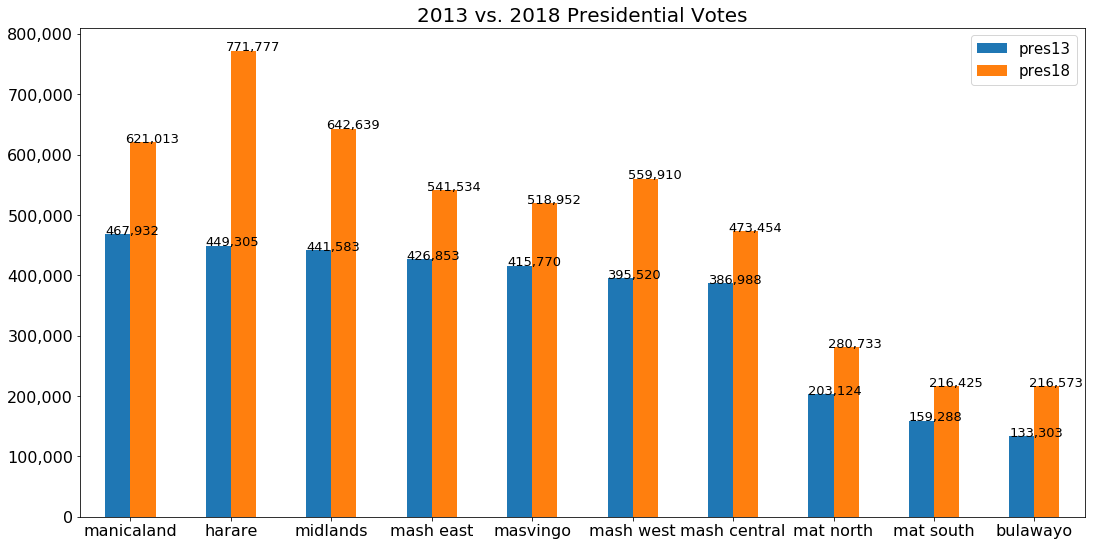

In [2499]:
d=comp[["pres13", "pres18"]].sort_values(by="pres13", ascending=False)
print("\nTotal/sum of votes \n","--"*20,  "\n"  ,
      d.sum().apply(lambda x: sep1000Formatter(x)) ,
      "\n" ,   "--"*20    , "\n"   )
g = d.plot(kind="bar", title="2013 vs. 2018 Presidential Votes",
          figsize=(18,9), fontsize=16)
g.set_xticklabels(d.index,rotation=0, size=16)
g.title.set_size(20)
g.legend(fontsize=15)
g.get_yaxis().set_major_formatter(tic.FuncFormatter(lambda x, p: format(int(x), ',')))
for j in range(len(d)):
    g.text(j-0.25, d.iloc[j,0],sep1000Formatter(d.iloc[j,0]), fontsize=13)
    g.text( j-0.05, d.iloc[j,1], sep1000Formatter(d.iloc[j,1]), fontsize=13)

#### Compare Parliamentary 2013 vs 2018


Total/sum of votes 
 ---------------------------------------- 
 parly13    3,378,377
parly18    4,692,652
dtype: object 
 ---------------------------------------- 



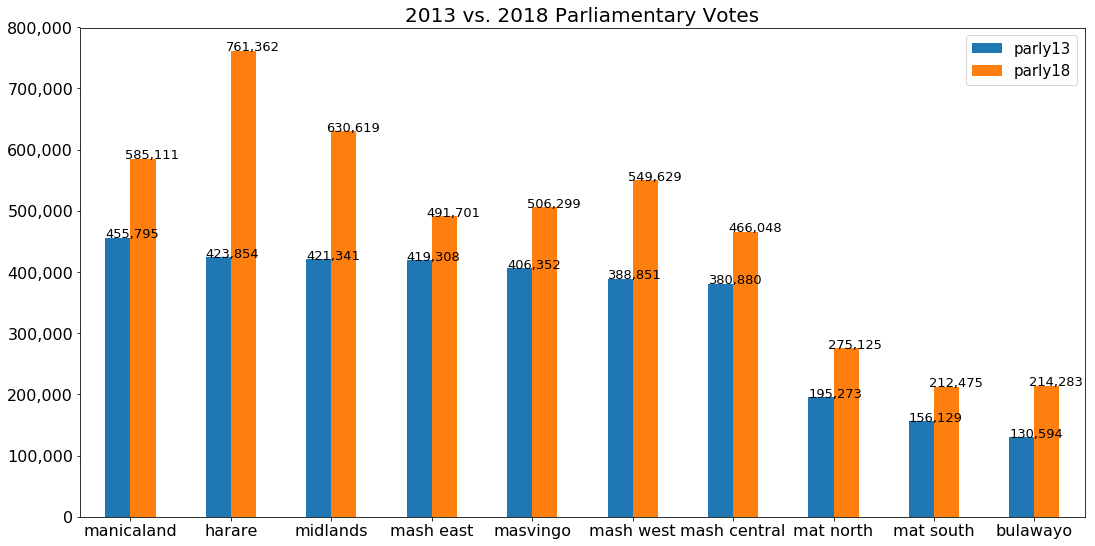

In [2501]:
d=comp[["parly13", "parly18"]].sort_values(by="parly13", ascending=False)
print("\nTotal/sum of votes \n","--"*20,  "\n"  ,
      d.sum().apply(lambda x: sep1000Formatter(x)) ,
      "\n" ,   "--"*20    , "\n"   )
g = d.plot(kind="bar", title="2013 vs. 2018 Parliamentary Votes",
          figsize=(18,9), fontsize=16)
g.set_xticklabels(d.index,rotation=0, size=16)
g.title.set_size(20)
g.legend(fontsize=15)
g.get_yaxis().set_major_formatter(tic.FuncFormatter(lambda x, p: format(int(x), ',')))
for j in range(len(d)):
    g.text(j-0.25, d.iloc[j,0],sep1000Formatter(d.iloc[j,0]), fontsize=13)
    g.text( j-0.05, d.iloc[j,1], sep1000Formatter(d.iloc[j,1]), fontsize=13)

---
# END OF TRANSFORM SCRIPT